# Environmental and cultural predictors of Pacific islands deforestation <a class="tocSkip">

# Introduction

## Motivation

The number of Pacific islands with historical human presence and their relative isolation make them a good testbed for quantitative testing theories of civilization collapse. In particular, since timber has always been a scarce resource on most of the Pacific islands, forests played a major role in sustaining Pacific societies. Two works have analyzed whether the degree of pre-European deforestation could be inferred just from the knowledge of environmental [[1](#1), [2](#2)] and cultural variables [[2](#2)]. Rollett & Diamond, 2004 [[1](#1)] gathered data on reported deforestation and forest replacement levels and various environmental variables (such as location, rainfall) and performed robust linear regression and tree modeling to estimate the importance of those variables. Atkinson et al. 2016 [[2](#2)] refined the analysis by accounting for possible shared cultural ancestry and geographical proximity effects, which might put in doubt the apparent statistical independence of the island-samples ([Galton's problem](https://en.wikipedia.org/wiki/Galton%27s_problem)). Their result is that an analysis in the spirit of Rollet & Diamond is justified for deforestation but not for forest replacement, which is clearly influenced by culture and tradition.

In this project we employ the methods of machine learning to build models predicting deforestation based on data from from [[1](#1)] and [[2](#2)]. Moreover we use various methods of estimation how individual variables contribute to the outcome, including the cutting-edge SHAP (SHapley Additive exPlanations based on game-theoretic 
[Shapley values](https://en.wikipedia.org/wiki/Shapley_value)). Our goal is not to reproduce the results of the mentioned papers and perform a meticulous statistical analysis but rather to see how the modern tools of data science can supplement the statistical approaches of environmental science.

## Dataset

Our dataset `pacific-deforestation.csv` results from merging publicly available datasets of [[1](#1)] and [[2](#2)]. The procedure is described in the notebook `merge-data.ipynb`, which should be run before running this notebook.

1. Outcome variables:
    - Deforestation (scale: 1 (almost no deforestation) - 5 (full deforestation))
    - Forest Replacement (scale: 1 (natural species) - 4 (human-introduced species))
2. Environmental variables:
    - Latitude (degrees)
    - Longitude (degrees)
    - Area (individual island, km<sup>2</sup>)
    - Area 50 (all islands within 50 km, km<sup>2</sup>)
    - Isolation (km to nearest island >25% size of home island)
    - Isolation 75 (km to nearest island >75% size of home island)
    - Elevation (highest point, m)
    - Rainfall (at sea level, mm/y)
    - Dust (continental dust fallout, mg/m<sup>2</sup>/y)
    - Makatea (% of island consisting of makatea (uplifted reef)) 
    - Age (island age based on the presence of volcanic rocks, scale: 1 (young) - 3 (old))
    - Tephra (volcanic ash fallout based on location with respect to [Andesite line](https://en.wikipedia.org/wiki/Andesite_line): scale: 1 (low) - 3 (high))
3. Cultural variables:
    - Agricultural intensification
        * Irrigation (yes/no)
        * Arboricultural (tree crops, yes/no)
        * Dry (rock gardens and mulching, yes/no)
    - Land tenure norms
        * Elite Ownership (yes/no)
        * Individual Ownership (yes/no)


    

## References

[<a name="1">1</a>] Rolett, B. & Diamond, J. [Environmental predictors of pre-European deforestation on Pacific islands](https://www.nature.com/articles/nature02801). Nature 431, 443 (2004).

[<a name="2">2</a>] Atkinson, Q. D., Coomber, T., Passmore, S., Greenhill, S. J. & Kushnick, G. [Cultural and Environmental Predictors of Pre-European Deforestation on Pacific Islands](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0156340). PLOS ONE 11, e0156340 (2016).


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>References</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Loading-and-extending-dataset" data-toc-modified-id="Loading-and-extending-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading and extending dataset</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Preliminary-data-analysis" data-toc-modified-id="Preliminary-data-analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Preliminary data analysis</a></span></li><li><span><a href="#Generating-and-transforming-geographic-data" data-toc-modified-id="Generating-and-transforming-geographic-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Generating and transforming geographic data</a></span></li><li><span><a href="#Spatial-plots-of-deforestation-and-its-potential-predictors" data-toc-modified-id="Spatial-plots-of-deforestation-and-its-potential-predictors-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Spatial plots of deforestation and its potential predictors</a></span></li><li><span><a href="#Correlations-between-variables" data-toc-modified-id="Correlations-between-variables-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Correlations between variables</a></span><ul class="toc-item"><li><span><a href="#Environmental-variables" data-toc-modified-id="Environmental-variables-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Environmental variables</a></span></li><li><span><a href="#Cultural-variables" data-toc-modified-id="Cultural-variables-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Cultural variables</a></span></li></ul></li></ul></li><li><span><a href="#Model-Building-and-Evaluation" data-toc-modified-id="Model-Building-and-Evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Building and Evaluation</a></span><ul class="toc-item"><li><span><a href="#Outcomes-and-inputes" data-toc-modified-id="Outcomes-and-inputes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Outcomes and inputes</a></span></li><li><span><a href="#Imputing-and-pipeline" data-toc-modified-id="Imputing-and-pipeline-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Imputing and pipeline</a></span></li><li><span><a href="#Cross-validation-scoring-and-hyper-parameters-search" data-toc-modified-id="Cross-validation-scoring-and-hyper-parameters-search-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cross-validation scoring and hyper parameters search</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Least-Squares-Linear-Regression" data-toc-modified-id="Least-Squares-Linear-Regression-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Least Squares Linear Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Huber-Linear-Regression" data-toc-modified-id="Huber-Linear-Regression-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Huber Linear Regression</a></span></li><li><span><a href="#Huber-+-Ridge-Regression" data-toc-modified-id="Huber-+-Ridge-Regression-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Huber + Ridge Regression</a></span></li><li><span><a href="#Tree-Regression" data-toc-modified-id="Tree-Regression-3.4.6"><span class="toc-item-num">3.4.6&nbsp;&nbsp;</span>Tree Regression</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-3.4.7"><span class="toc-item-num">3.4.7&nbsp;&nbsp;</span>Random Forest Regression</a></span></li><li><span><a href="#Gradient-Boosting-Regression" data-toc-modified-id="Gradient-Boosting-Regression-3.4.8"><span class="toc-item-num">3.4.8&nbsp;&nbsp;</span>Gradient Boosting Regression</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model Comparison</a></span></li></ul></li><li><span><a href="#Feature-Importance-and-Explainability" data-toc-modified-id="Feature-Importance-and-Explainability-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Importance and Explainability</a></span><ul class="toc-item"><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature importance</a></span><ul class="toc-item"><li><span><a href="#Tree-Feature-Importance" data-toc-modified-id="Tree-Feature-Importance-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Tree Feature Importance</a></span></li><li><span><a href="#Linear-Regression-Coefficients" data-toc-modified-id="Linear-Regression-Coefficients-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Linear Regression Coefficients</a></span></li><li><span><a href="#Permutation-importance" data-toc-modified-id="Permutation-importance-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Permutation importance</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Model-Refinement" data-toc-modified-id="Model-Refinement-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model Refinement</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Huber-Linear-Regression" data-toc-modified-id="Huber-Linear-Regression-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Huber Linear Regression</a></span></li><li><span><a href="#Tree-Regression" data-toc-modified-id="Tree-Regression-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Tree Regression</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Random Forest Regression</a></span></li></ul></li><li><span><a href="#Scoring" data-toc-modified-id="Scoring-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Scoring</a></span></li><li><span><a href="#Feature-importance:-repeated" data-toc-modified-id="Feature-importance:-repeated-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Feature importance: repeated</a></span><ul class="toc-item"><li><span><a href="#Tree-Feature-Importance" data-toc-modified-id="Tree-Feature-Importance-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Tree Feature Importance</a></span></li><li><span><a href="#Linear-Regression-Coefficients" data-toc-modified-id="Linear-Regression-Coefficients-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Linear Regression Coefficients</a></span></li><li><span><a href="#Permutation-Importance" data-toc-modified-id="Permutation-Importance-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Permutation Importance</a></span></li></ul></li><li><span><a href="#Model-Explainability" data-toc-modified-id="Model-Explainability-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Model Explainability</a></span><ul class="toc-item"><li><span><a href="#Huber-Reggression" data-toc-modified-id="Huber-Reggression-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Huber Reggression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Explaining-outcomes-for-individual-islands" data-toc-modified-id="Explaining-outcomes-for-individual-islands-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Explaining outcomes for individual islands</a></span><ul class="toc-item"><li><span><a href="#Easter-Island" data-toc-modified-id="Easter-Island-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Easter Island</a></span></li><li><span><a href="#Hawaii-(leeward-side)" data-toc-modified-id="Hawaii-(leeward-side)-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Hawaii (leeward side)</a></span></li><li><span><a href="#Hawaii-(windward-side)" data-toc-modified-id="Hawaii-(windward-side)-4.7.3"><span class="toc-item-num">4.7.3&nbsp;&nbsp;</span>Hawaii (windward side)</a></span></li></ul></li><li><span><a href="#All-predictions-of-Huber-Regression-model" data-toc-modified-id="All-predictions-of-Huber-Regression-model-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>All predictions of Huber Regression model</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Comparison-with-previous-works" data-toc-modified-id="Comparison-with-previous-works-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparison with previous works</a></span></li></ul></li></ul></div>

In [1]:
# Import modules and initialize

import os, sys, yaml
print("Working directory: ", os.getcwd())
conf = {k: v for d in yaml.safe_load(open(os.path.join("..", "conf.yaml"))) for k, v in d.items()}
sys.path.insert(0, os.path.join("..", conf["src"]))

import math
import numpy as np
from scipy import stats
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import shap 

from my_plots import spatial_plot

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(conf['viz'])
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
shap.initjs()

Working directory:  /home/patryk/pCloud/PROJECTS/pacific-deforestation/notebooks


# Exploratory data analysis

## Loading and extending dataset

In [2]:
data = pd.read_csv(os.path.join("..", conf["data"]["cln"], "pacific-deforestation.csv"), index_col=0)
data.head(10)

,Archipelago,Deforestation,Replacement,Latitude,Longitude,Area,Area 50,Isolation,Isolation 75,Elevation,Rainfall,Dust,Makatea,Age,Tephra,Irrigation,Dry,Arboriculture,Elite Ownership,Individual Ownership
Island,,,,,,,,,,,,,,,,,,,,
Tubuai,Australs,4.0,4.0,-23.37,-149.47,45.0,45.0,180.0,210.0,422.0,2030.0,174.0,0.00,3.0,1.0,1.0,0.0,0.0,0.0,0.0
Rurutu,Australs,4.0,4.0,-22.47,-151.34,32.0,32.0,150.0,210.0,389.0,1899.0,181.0,0.10,2.5,1.0,1.0,0.0,0.0,0.0,0.0
Rimatara,Australs,4.0,4.0,-22.65,-152.81,9.0,9.0,150.0,150.0,83.0,1660.0,187.0,0.10,3.0,1.0,1.0,0.0,0.0,0.0,0.0
Rapa,Australs,4.0,4.0,-27.60,-144.34,40.0,40.0,600.0,600.0,650.0,2738.0,156.0,0.00,3.0,1.0,1.0,0.0,0.0,0.0,0.0
Raivavae,Australs,4.0,4.0,-23.87,-147.66,18.0,18.0,180.0,180.0,437.0,1841.0,168.0,0.00,3.0,1.0,1.0,0.0,0.0,0.0,0.0
New Britain (lee.),Bismarcks,2.0,2.0,-5.20,150.48,35742.0,43784.0,30.0,95.0,2439.0,4156.0,550.0,0.00,2.0,3.0,0.0,0.0,0.0,0.0,0.0
New Ireland,Bismarcks,2.0,2.0,-3.14,151.57,7174.0,44482.0,30.0,30.0,2399.0,3302.0,550.0,0.00,3.0,3.0,0.0,0.0,0.0,0.0,0.0
New Britain (wind.),Bismarcks,2.0,2.0,-6.12,149.50,35742.0,43784.0,30.0,95.0,2439.0,6076.0,550.0,0.00,2.0,3.0,0.0,0.0,0.0,0.0,0.0
Rarotonga,Cooks,3.0,4.0,-21.23,-159.78,67.0,67.0,165.0,165.0,653.0,2021.0,210.0,0.00,3.0,1.0,1.0,0.0,0.0,0.0,0.0


Following both Rolett 2004 and Atkinson 2016, we add Absolute Latitude and logarithms (base 10) of Area, Rainfall, Isolation and Elevation. We drop Replacement as it is not a predictor.

In [3]:
data["Abs Latitude"] = abs(data["Latitude"])
data["Log Area"] = np.log10(data["Area"])
data["Log Area 50"] = np.log10(data["Area 50"])
data["Log Rainfall"] = np.log10(data["Rainfall"])
data["Log Isolation"] = np.log10(data["Isolation"])
data["Log Isolation 75"] = np.log10(data["Isolation 75"])
data["Log Elevation"] = np.log10(data["Elevation"])
data.drop(columns="Replacement", inplace=True)

## Missing values

Missing values per columns and rows

In [4]:
def missing_values(df, axis):
    nans = df.isnull().sum(axis=axis)
    return nans[nans > 0]


def print_missing_value_statistics(data):
    per_column = missing_values(data, 0)
    per_row = missing_values(data, 1)
    tot = per_column.sum()
    perc = tot / data.size
    print("Total missing values: ", tot)
    print("Percentage of missing values: ", "{:.2f}%".format(100 * perc), '\n')
    print("Missing values per column", '\n')
    print(per_column, '\n')
    print("Missing values per row", '\n')
    print(per_row, '\n')


print_missing_value_statistics(data)

Total missing values:  18
Percentage of missing values:  0.84% 

Missing values per column 

Deforestation           2
Area 50                 1
Age                     4
Irrigation              2
Dry                     2
Arboriculture           2
Elite Ownership         2
Individual Ownership    2
Log Area 50             1
dtype: int64 

Missing values per row 

Island
Lakeba       2
Kahoolawe    6
Pitcairn     6
Tongatapu    1
Makatea      1
Alofi        1
Niue         1
dtype: int64 



Missing values in the dataset without rows for which Deforestation is not known.

In [5]:
print_missing_value_statistics(data.dropna(subset=["Deforestation"]))

Total missing values:  6
Percentage of missing values:  0.29% 

Missing values per column 

Area 50        1
Age            4
Log Area 50    1
dtype: int64 

Missing values per row 

Island
Lakeba       2
Tongatapu    1
Makatea      1
Alofi        1
Niue         1
dtype: int64 



Overall, missing values will not pose a big problem for our analysis. There are only 4 Age and 1 Area 50 variable missing. It will be easiest to drop Area 50 variable and use Area instead. We can replace missing Age values by the median value or also drop Age from the analysis.

## Preliminary data analysis

In [6]:
data.describe()

,Deforestation,Latitude,Longitude,Area,Area 50,Isolation,Isolation 75,Elevation,Rainfall,Dust,Makatea,Age,Tephra,Irrigation,Dry,Arboriculture,Elite Ownership,Individual Ownership,Abs Latitude,Log Area,Log Area 50,Log Rainfall,Log Isolation,Log Isolation 75,Log Elevation
count,80.000000,82.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,78.000000,82.000000,80.000000,80.00000,80.000000,80.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,82.000000
mean,3.125000,-9.478415,-41.014634,7609.415854,14124.633333,184.853659,294.945122,1152.621951,2199.524390,294.707317,0.050976,2.673077,1.841463,0.525000,0.41250,0.225000,0.300000,0.275000,17.645488,2.545556,2.864933,3.257647,1.691628,1.953776,2.850825
std,0.884107,16.707019,154.266640,26613.603243,50649.809601,496.443297,587.131066,995.784183,1353.032216,152.931800,0.178177,0.461695,0.961859,0.502525,0.49539,0.420217,0.461149,0.449331,7.407210,1.180442,1.219058,0.288266,0.664817,0.670451,0.519691
min,1.000000,-43.880000,-179.910000,0.200000,0.200000,2.000000,2.500000,15.000000,400.000000,5.000000,0.000000,1.500000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.140000,-0.698970,-0.698970,2.602060,0.301030,0.397940,1.176091
25%,2.000000,-19.425000,-157.320000,53.000000,70.000000,20.000000,30.000000,425.750000,1296.500000,174.000000,0.000000,2.125000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,12.777500,1.724050,1.845098,3.112656,1.301030,1.477121,2.629105
50%,3.000000,-15.550000,-146.000000,289.500000,1174.000000,45.000000,70.000000,998.000000,1968.500000,260.000000,0.000000,3.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,18.110000,2.459225,3.069668,3.294135,1.653213,1.845098,2.998960
75%,4.000000,-6.310000,160.292500,2695.500000,5856.000000,147.500000,210.000000,1466.250000,2996.750000,420.000000,0.000000,3.000000,3.000000,1.000000,1.00000,0.000000,1.000000,1.000000,21.207500,3.422899,3.767601,3.476650,2.168600,2.322219,3.165484
max,5.000000,23.570000,179.980000,150718.000000,266917.000000,3000.000000,3175.000000,4205.000000,7000.000000,750.000000,0.900000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.000000,43.880000,5.178165,5.426376,3.845098,3.477121,3.501744,3.623766


Values of Deforestation are distributed approximately normally around 3. There are relatively few extreme values 1 and 5. This can potentially limit our predictive power for extreme cases.

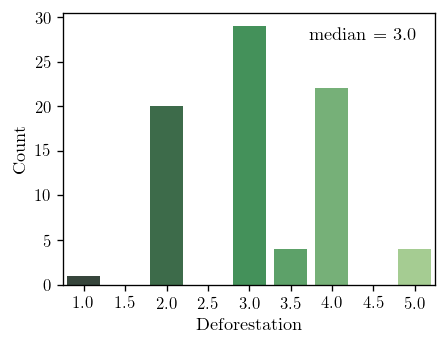

In [7]:
plt.style.use(conf['viz'])

fig, ax = plt.subplots()
bins = np.linspace(0.75, 5.25, 10)
counts, bins = np.histogram(data['Deforestation'], bins=bins)
vals = (bins[1:] + bins[:-1]) / 2
sns.barplot(vals, counts, palette="YlGn_d", ax=ax)
ax.set_xlabel("Deforestation")
ax.set_ylabel("Count")
median = data["Deforestation"].median()
ax.text(0.95, 0.95, "median = {}".format(median),
        va='top', ha='right', transform=ax.transAxes)

fig.savefig(os.path.join("..", conf["data"]["out"], "deforestation-dist.png"))

Let's look at the Spearman (rank) correlations of all variables with Deforestation. 

In [8]:
def correlations(data, column, method):
    return data.corr(method=method)[column].drop(column).sort_values(ascending=False)
    
correlations(data, "Deforestation", "spearman")

Abs Latitude            0.569439
Irrigation              0.424757
Elite Ownership         0.269081
Age                     0.250123
Makatea                 0.168068
Log Isolation           0.164477
Isolation               0.164477
Isolation 75            0.104114
Log Isolation 75        0.104114
Arboriculture          -0.051473
Dry                    -0.087899
Latitude               -0.106412
Dust                   -0.131657
Individual Ownership   -0.176716
Longitude              -0.269755
Elevation              -0.321578
Log Elevation          -0.321578
Log Area 50            -0.392369
Area 50                -0.392369
Log Area               -0.400400
Area                   -0.400400
Tephra                 -0.530870
Rainfall               -0.651008
Log Rainfall           -0.651008
Name: Deforestation, dtype: float64

The variables most positively rank-correlated (> 0.3) with Deforestation are: 
* Abs Latitude
* Longitude
* Irrigation

Most negatively (< -0.3):
* Rainfall
* Tephra
* Area, Area 50
* Elevation

## Generating and transforming geographic data 

We would like to visualize the most important variables on a map. For spatial plots we will make use of GeoDataDrame from Geopandas.

In [9]:
def geodf_from_df(df):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

Since meridian 180 passes through the Pacific Ocean, it is convenient to transform longitudes from range [-180, 180] to [0, 360].

In [10]:
data.Longitude = (data.Longitude + 360) % 360
geodata = geodf_from_df(data)

We will label spatial plots with names of archipelagos.

In [11]:
archipelagos = data[["Archipelago", "Latitude", "Longitude"]].groupby("Archipelago").mean()
# Move some labels such that they do not collide
archipelagos.loc["Marquesas", "Longitude"] -= 2 
archipelagos.loc["Tonga", "Longitude"] += 3 
archipelagos.loc["Fiji", "Latitude"] += 2 
archipelagos.loc["Vanuatu", "Latitude"] += 1 
archipelagos.loc["Tuamotus", "Latitude"] += 2 
archipelagos.loc["Samoa", "Latitude"] += 1 
archipelagos = geodf_from_df(archipelagos)

Background world map for our spatial plots will be sourced from a shapefile `ne_50m_land.shp` provided by [Natural Earth](https://www.naturalearthdata.com/). We need to transform it, such that longitudes run from 0 to 360.

In [12]:
world_shapefile = os.path.join("..", conf["data"]["raw"], "ne_50m_land.shp")
world = gpd.read_file(world_shapefile)
world_E, world_W = world.cx[130:180,-50:30], world.cx[-180:-100,-50:30]
world = pd.concat([world_E, world_W])
world = world.to_crs({"proj": "latlong", "lon_wrap": 180})

## Spatial plots of deforestation and its potential predictors

We illustrate the spatial distribution of the outcome variable Deforestation, as well as of predictor variables which were the most rank-correlated with Deforestation (Log Rainfall, Tephra, Area, Irrigation; not Abs Latitude and Longitude since they can be easily read from the map). We make use of the function `spatial plot` defined in `code/my_plots.py`.

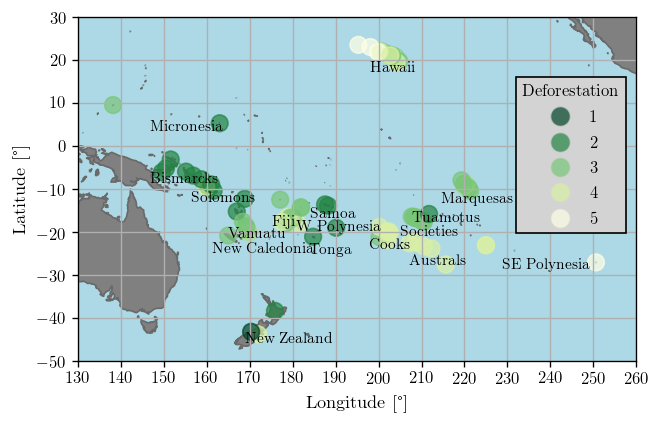

In [13]:
plt.style.use(conf['viz'])

fig = spatial_plot(geodata, "Deforestation", world, labels=archipelagos,
                   cmap="YlGn_r", alpha=0.7, markersize=100, leg_prec=0, 
                   figwidth=6)

fig.savefig(os.path.join("..", conf["data"]["out"], "spatial-deforestation.png"),
            facecolor="none")

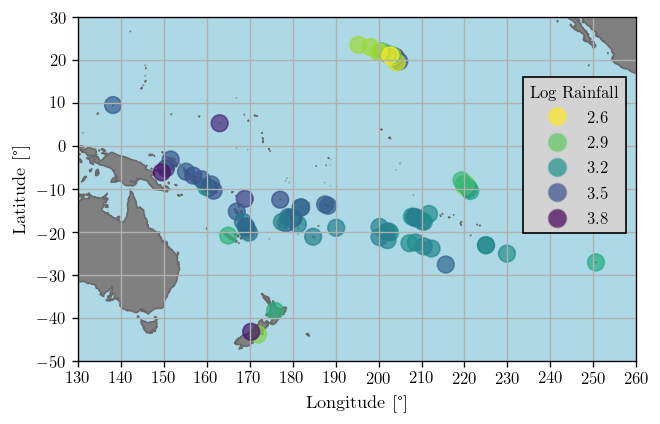

In [14]:
fig = spatial_plot(geodata, "Log Rainfall", world, 
                   cmap="viridis_r", alpha=0.7, markersize=100)
fig.savefig(os.path.join("..", conf["data"]["scratch"], "spatial-rainfall.png"))

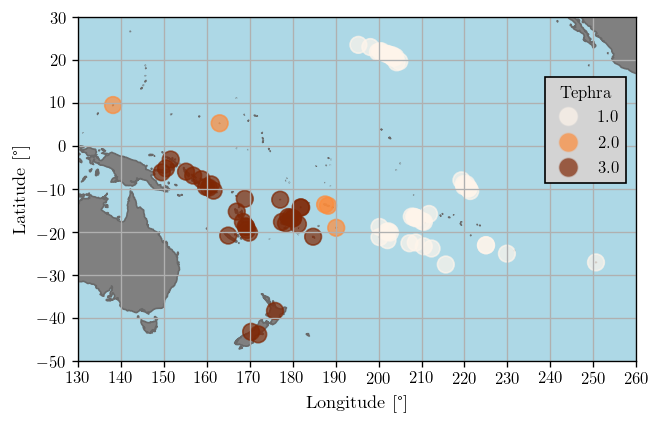

In [15]:
fig = spatial_plot(geodata, "Tephra", world, 
                   cmap="Oranges", alpha=0.7, markersize=100, n_levels=3)
fig.savefig(os.path.join("..", conf["data"]["scratch"], "spatial-tephra.png"))

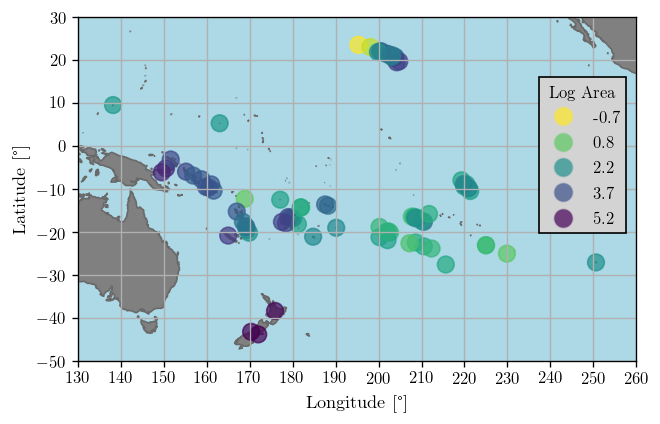

In [16]:
fig = spatial_plot(geodata, "Log Area", world, 
                   cmap="viridis_r", alpha=0.7, markersize=100)
fig.savefig(os.path.join("..", conf["data"]["scratch"], "spatial-area.png"))

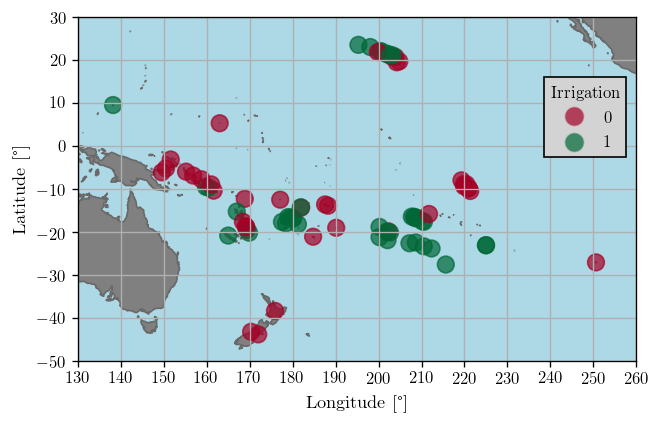

In [17]:
fig = spatial_plot(geodata, "Irrigation", world, 
                   cmap="RdYlGn", alpha=0.7, markersize=100, n_levels=2, leg_prec=0)
fig.savefig(os.path.join("..", conf["data"]["scratch"], "spatial-irrigation.png"))

We see considerable similarities of spatial patterns for Deforestation and Log Rainfall, pointing to the importance of Rainfall variable. Some of the variables, like Tephra and Longitude seem to be strongly correlated. To remove redundant information, we will have to remove some of them.

## Correlations between variables

We will look for linear (Pearson) correlation between environmental and cultural variables.

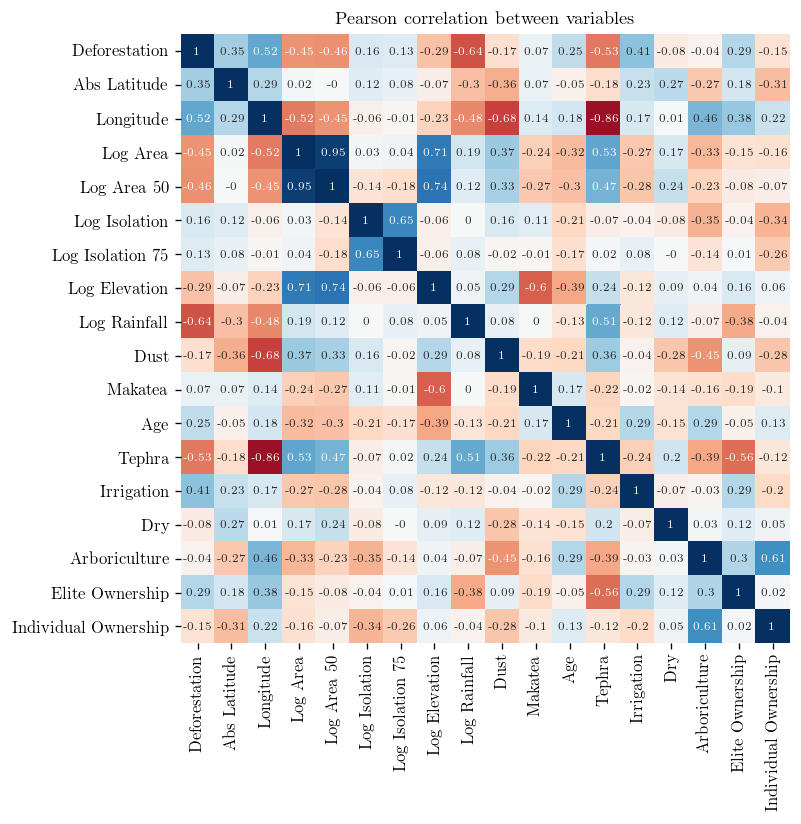

In [18]:
env_cols = ["Abs Latitude", "Longitude", "Log Area", "Log Area 50", "Log Isolation", "Log Isolation 75",
            "Log Elevation", "Log Rainfall", "Dust", "Makatea", "Age", "Tephra"]

cult_cols = ["Irrigation", "Dry", "Arboriculture", "Elite Ownership", "Individual Ownership"]

fig, ax = plt.subplots(figsize=(7, 7))
corr = data[["Deforestation"] + env_cols + cult_cols].corr().round(2)
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap="RdBu", cbar=None, cbar_kws={"shrink":.5}, 
            annot=True, annot_kws={"size": 7}, square=True, ax=ax);

ax.set_title("Pearson correlation between variables")
fig.tight_layout()

fig.savefig(os.path.join("..", conf["data"]["scratch"], "pearson-corr-all.png"))

Longitude has a strong correlation with Tephra (since Tephra is constructed based on geographical location) and many spurious correlations with other variables. Since we do not expect Longitude itself to have any causal relation to Deforestation, we will drop it. Absolute Latitude has a physical meaning as it is a proxy of average temperature.

In [19]:
if "Longitude" in env_cols:
    env_cols.remove("Longitude")

Now we want to determine the correlations between Log Area, Log Area 50 and Log Isolation, Log Isolation 75.

/home/patryk/miniconda3/envs/pacific-deforestation/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/patryk/miniconda3/envs/pacific-deforestation/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


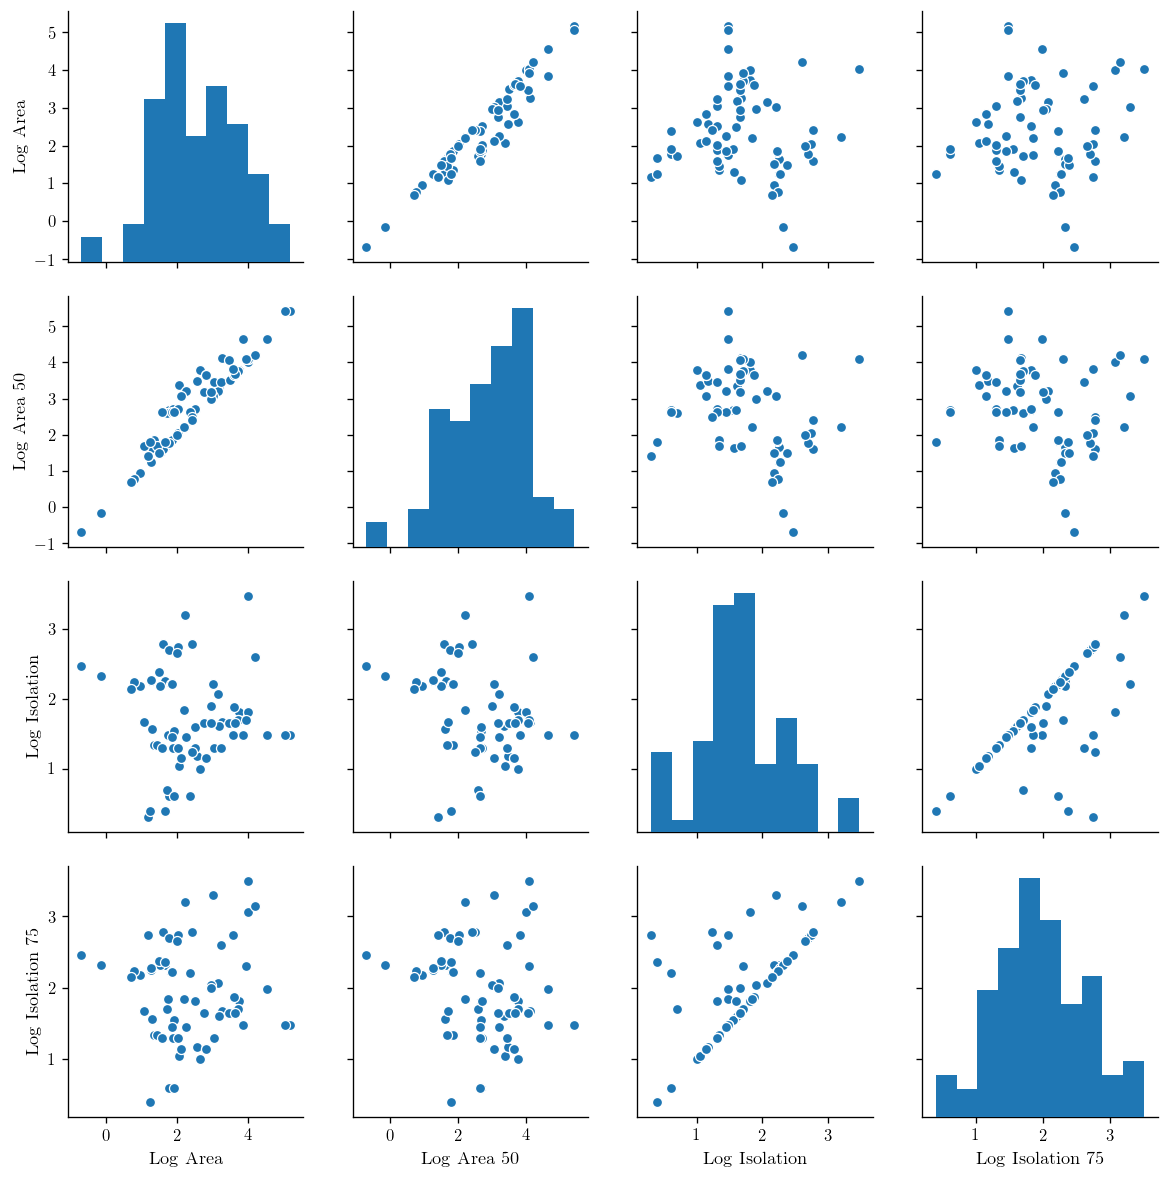

In [20]:
sns.pairplot(data, vars=["Log Area", "Log Area 50", "Log Isolation", "Log Isolation 75"]);

Log Area, Log Area 50 and Log Isolation, Log Isolation 75 are indeed strongly correlated. It is though unclear which ones will be better predictors of Deforestation. However, since Isolation correlate slightly more with Deforestation and Area has a more natural definition than Area 50 we will use Log Isolation and Log Area.

In [21]:
for var in ["Log Area 50", "Log Isolation 75"]:
    if var in env_cols:
        env_cols.remove(var) 

### Environmental variables

Let's plot distribution of environmental variables and pairwise scatter plots with fitted regression lines.

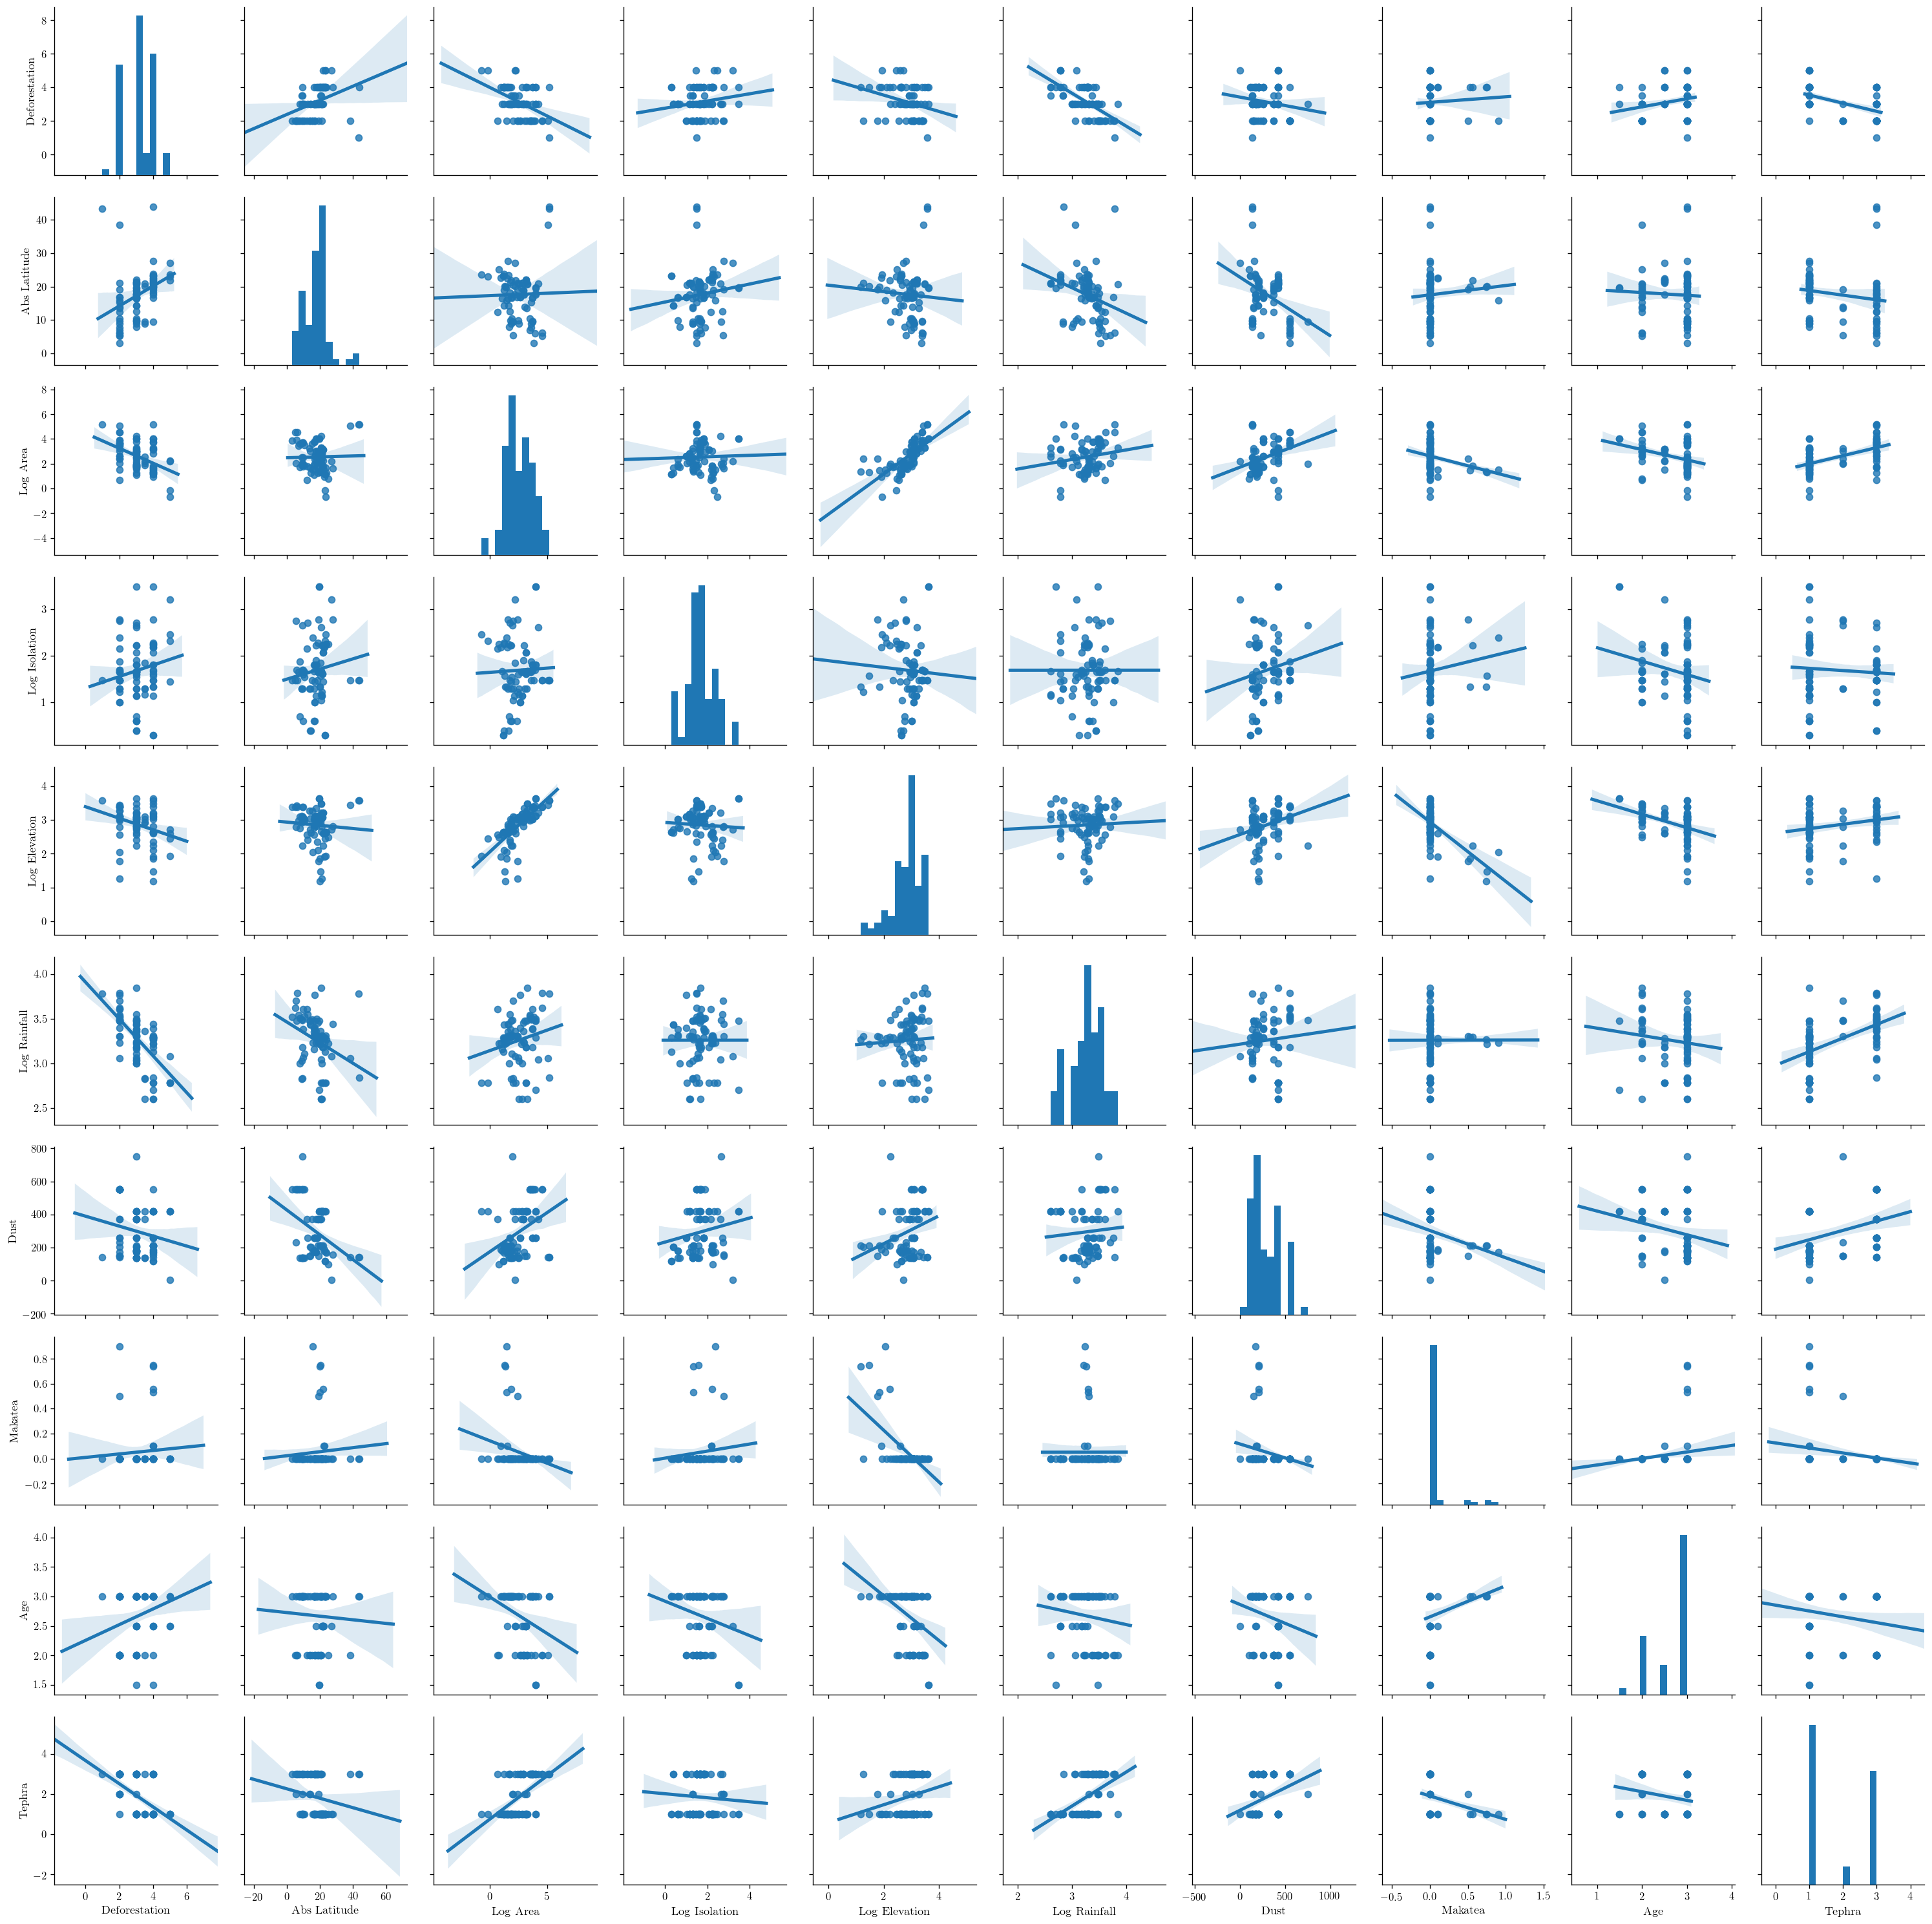

In [22]:
sns.pairplot(data, vars=["Deforestation"] + env_cols, kind="reg");

In most cases trends are not very clear due to a low number of samples and value discretizations (with exceptions). It is worth noting:
1. Regression lines Deforestation vs. Log Rainfall and vs. Area have a clearly negative slope. 
2. Log Area is strongly collinear with Log Elevation (which is understandable: it is more likely that big islands have high mountains).
3. Abs Latitude exhibits three outliers (New Zealand) which lie much further from the Equator than any other island.

Finally, we plot normalized distributions of environmental variables corresponding to Deforestation either above or below its median value. This could guide us in finding good predictors for extreme values.

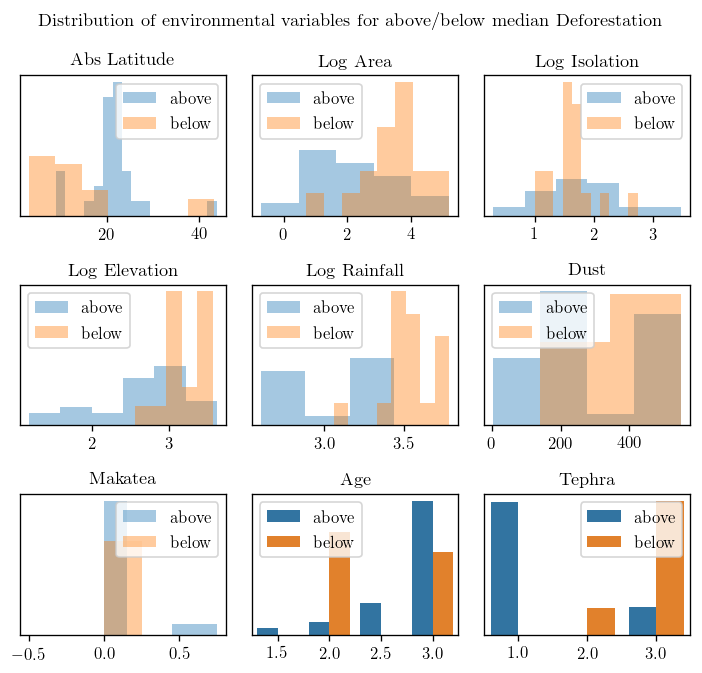

In [23]:
data_plot = data[data["Deforestation"] != data["Deforestation"].median()].dropna().copy()
data_plot["rel_to_median"] = np.where(data_plot["Deforestation"] > median, "above", "below")

def normalized_countplot(x, data, ax, hue):
    prob_data = data[x].groupby(data[hue]).value_counts(normalize=True)
    prob_data = prob_data.rename("Probability").reset_index()
    return sns.barplot(x=x, y="Probability", data=prob_data, hue=hue, ax=ax) 

fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for col, ax in zip(env_cols, axes.flat):
    if col not in ["Age", "Tephra"]:
        sns.distplot(data_plot[data_plot["rel_to_median"] == "above"][col], 
                     label="above", norm_hist=True, kde=False, ax=ax)
        sns.distplot(data_plot[data_plot["rel_to_median"] == "below"][col], 
                     label="below", norm_hist=True, kde=False, ax=ax)
    else:
        normalized_countplot(x=col, data=data_plot, hue="rel_to_median", ax=ax)
    ax.set_xlabel(None)
    ax.legend()
    ax.set_title(col)
    ax.get_yaxis().set_visible(False)    

fig.suptitle("Distribution of environmental variables for above/below median Deforestation")
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

fig.savefig(os.path.join("..", conf["data"]["out"], "env-vars-extremes.png"))

Apart from confirming previous observations for Rainfall and Area we notice that
1. Tephra = 1 could be a good predictor for increased, and Tephra = 3 for decreased Deforestation.
2. Age = 3 could be a good predictor for increased Deforestation.

### Cultural variables

Let's plot distribution of cultural variables and pairwise scatter plots with fitted regression lines.

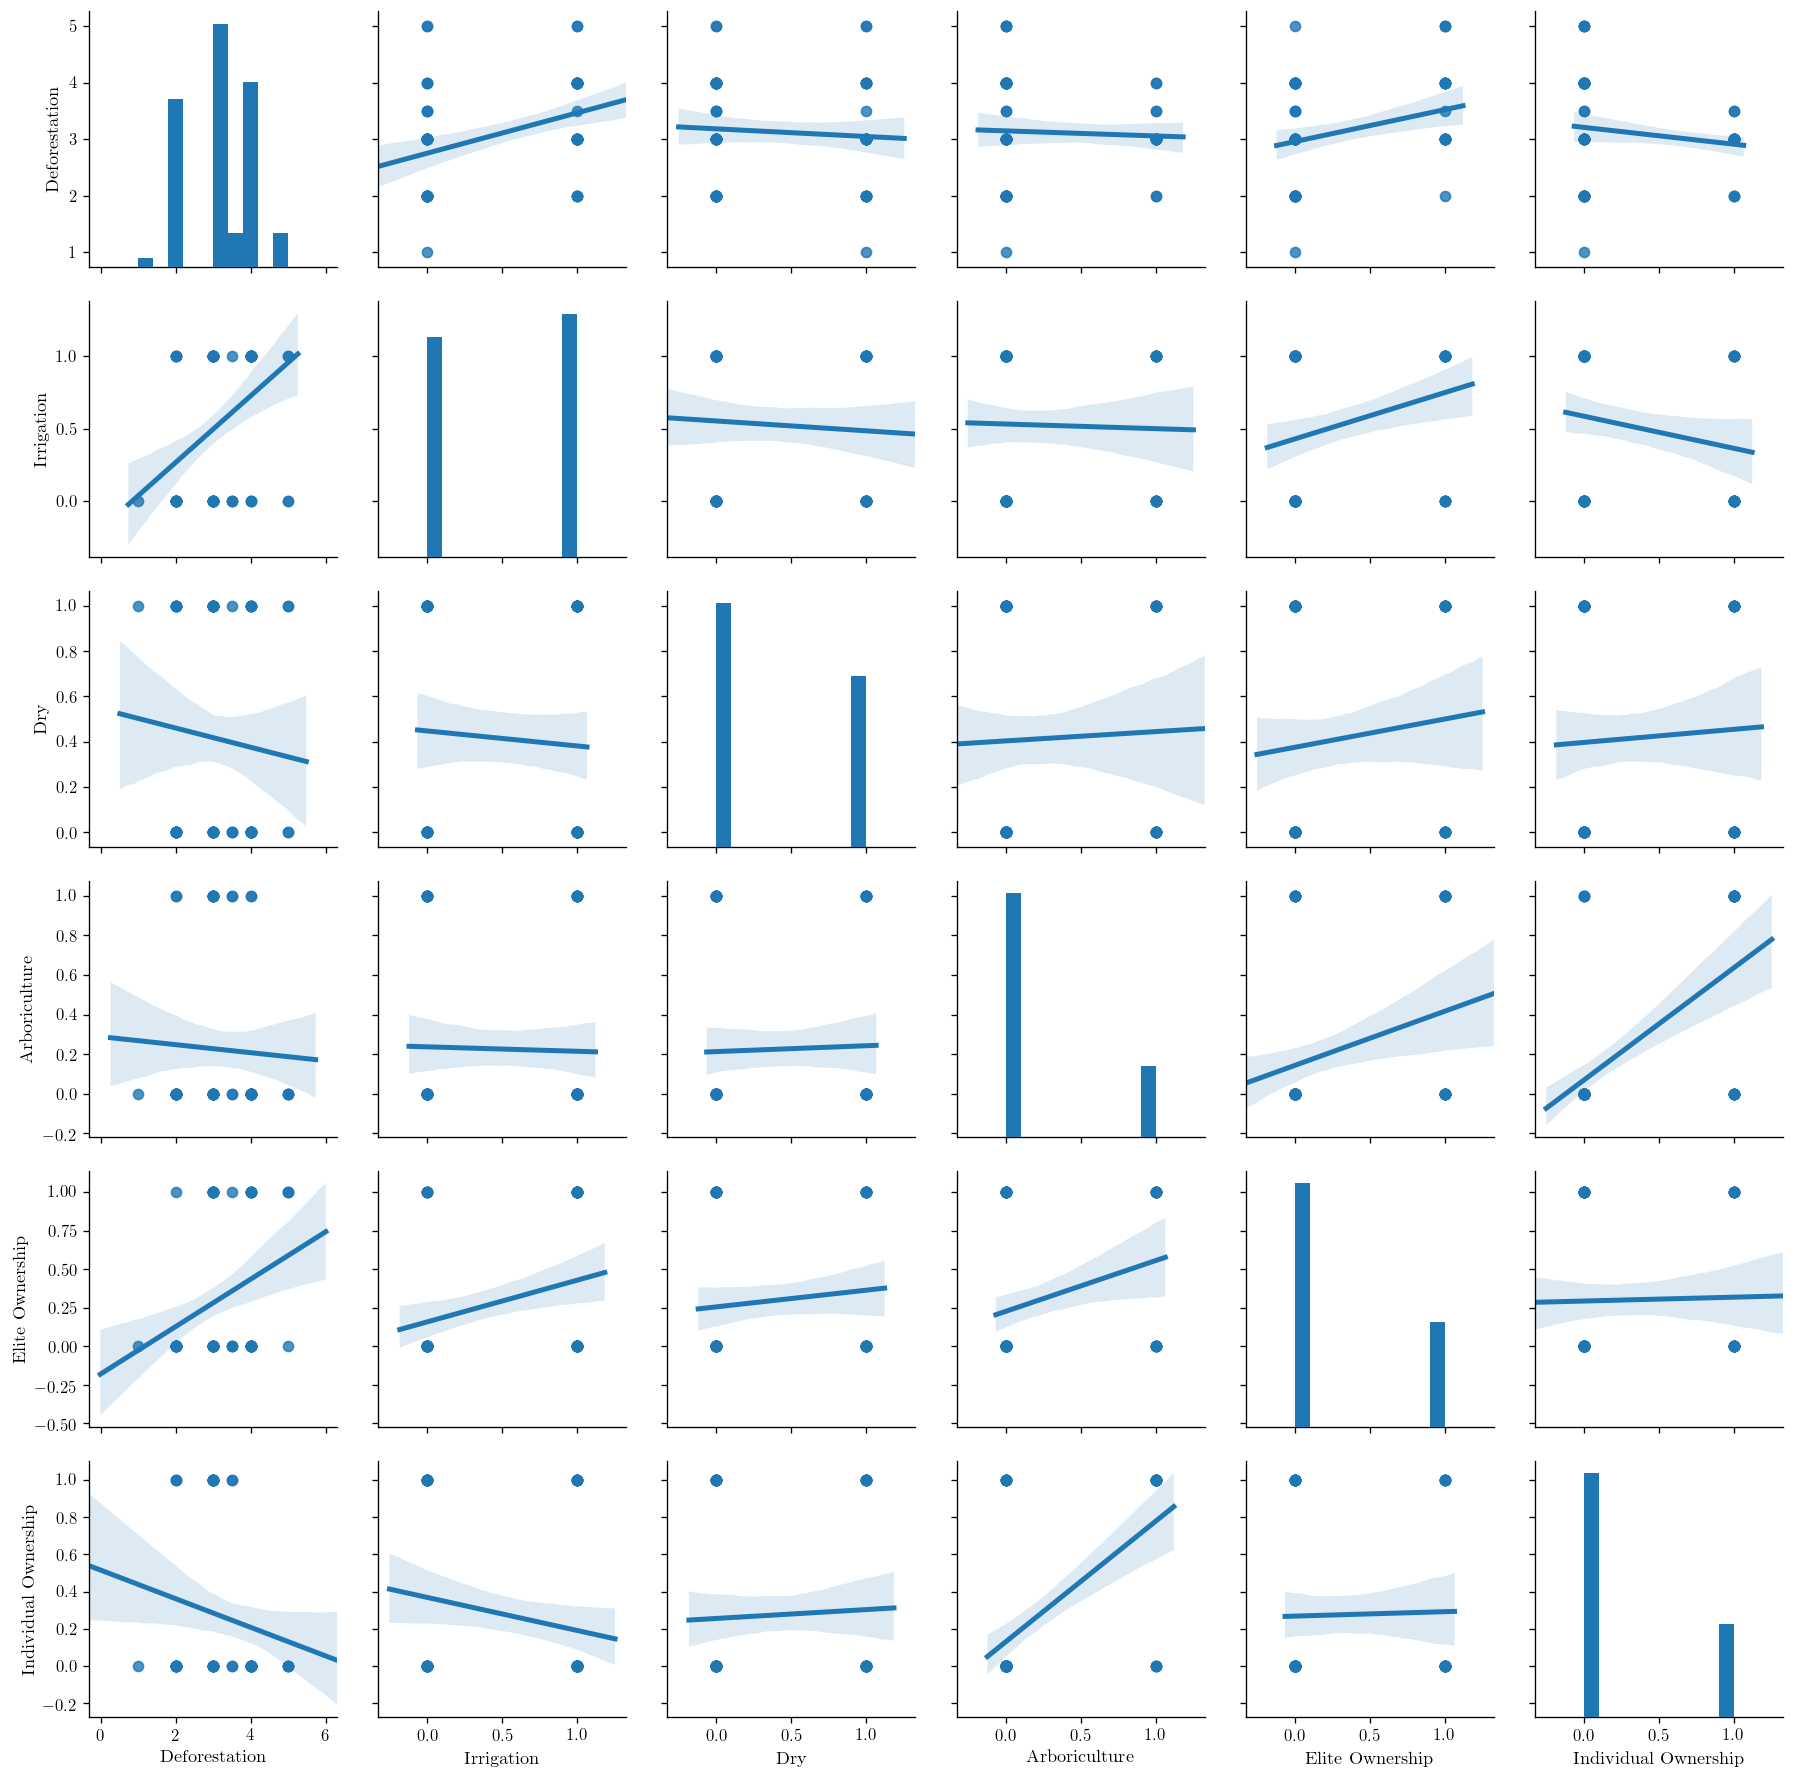

In [24]:
sns.pairplot(data, vars=["Deforestation"] + cult_cols, kind="reg");

Because cultural variables are binary it is hard to draw far-reaching conclusions. However, we observe that Irrigation and Elite Ownership are positively correlated with Deforestation. 

Finally, we plot normalized counts of cultural variables corresponding to above and below average deforestation. We calculate percentages, not counts, since numbers of "above" and "below" samples are not equal.

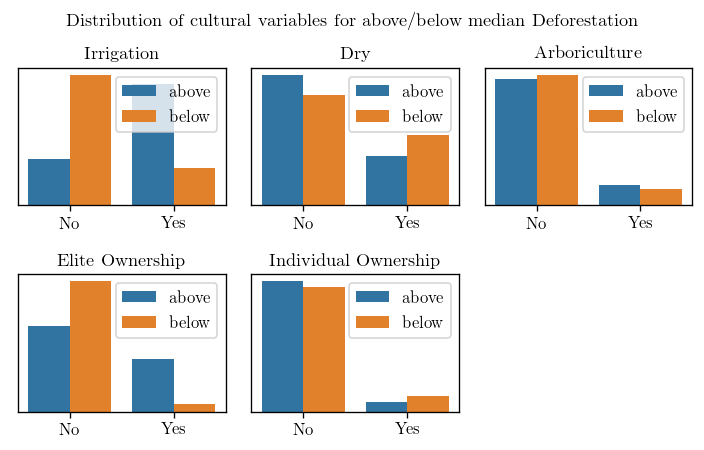

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
axes.flat[-1].axis('off')

for col, ax in zip(cult_cols, axes.flat[:-1]):
    normalized_countplot(x=col, data=data_plot, hue="rel_to_median", ax=ax)
    ax.set_xlabel(None)
    ax.set_xticklabels(["No", "Yes"])
    ax.legend()
    ax.set_title(col)
    ax.get_yaxis().set_visible(False)    

fig.suptitle("Distribution of cultural variables for above/below median Deforestation")
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

fig.savefig(os.path.join("..", conf["data"]["out"], "cult-vars-extremes.png"))

We observe that Irrigation = Yes and Elite Ownership = Yes might potentially be good predictors for increased Deforestation and Irrigation = No might be a good predictor for decreased deforestation.

# Model Building and Evaluation

## Outcomes and inputes

In the first iteration we will use all of the variables we have decided to keep until this moment

In [26]:
X = data.dropna(subset=["Deforestation"])[env_cols + cult_cols]
y = data.dropna(subset=["Deforestation"])["Deforestation"]
n_samples, n_features = X.shape
print("Number of samples: ", n_samples)
print("Number of features: ", n_features)

Number of samples:  80
Number of features:  14


## Imputing and pipeline

We will be replacing all the missing Age values by Age median value

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

def generate_pipeline(imputer, model, selector=None, preprocessor=None, params=None):
    pipeline = []
    if selector:
        pipeline.append(('sel', selector))
    if preprocessor:
        pipeline.append(('pre', preprocessor))
    pipeline += [('imp', imputer), ('model', model)]
    pipeline = Pipeline(pipeline)
    if params == None:
        return pipeline
    else:
        pipeline_params = {"model__" + key: val for key, val in params.items()}
        return pipeline, pipeline_params

## Cross-validation scoring and hyper parameters search

Because our dataset is small we will not split it into train, validation and test set. Instead we will perform two Leave-P-Out cross-validation: one CV for determining optimal model hyper parameters (function `search params`) and another more thorough CV for testing models performance (function `score`). In principle a true nested CV would be needed for a proper model evaluation. However, since it is computationally costly, we postpone it to to the further section after we have selected the most promising models.

In [28]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, ShuffleSplit, RandomizedSearchCV

def score(pipeline, X, y, p=3, n_splits=200, metric="neg_mean_absolute_error"):
    cv = ShuffleSplit(n_splits=n_splits, test_size=p, random_state=0) if p > 1 else LeaveOneOut()      
    n_splits = cv.get_n_splits(X)
    print("Scoring, number of splits: {}".format(n_splits))
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=metric, n_jobs=-1)
    return -scores

def report_on_scores(scores):
    mean, median, std = scores.mean(), np.median(scores), scores.std()
    print("Scores: mean = {:.3f} +- {:.3f}, median = {:.3f}, stand. dev. = {:.3f}".format(
        mean, std / math.sqrt(len(scores)), median, std))
    return mean

def search_params(pipeline, param_dist, X, y, n_iters=100, p=3, n_splits=40, search=True):
    metric = "neg_mean_absolute_error"
    cv = ShuffleSplit(n_splits=n_splits, test_size=p, random_state=0)     
    n_splits = cv.get_n_splits(X)
    print("Searching param space, iterations: {}, evaluation splits: {}".format(n_iters, n_splits))
    search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                n_iter=n_iters, cv=cv, scoring=metric, 
                                n_jobs=-1, iid=False)
    if search:
        search.fit(X, y)
    return search

def report_on_search(search, n_top=5):
    results = search.cv_results_
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  -results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
searching_on = False

## Models

### Baseline model

In [29]:
from sklearn.dummy import DummyRegressor

# score = 0.654
baseline = DummyRegressor(strategy='median')

baseline_score = score(baseline, X, y, p=3, n_splits=40)
report_on_scores(baseline_score);

Scoring, number of splits: 40
Scores: mean = 0.654 +- 0.050, median = 0.667, stand. dev. = 0.317


### Least Squares Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

# score = 0.553
model = LinearRegression()

least_squares = generate_pipeline(imputer, model, preprocessor=StandardScaler())

if searching_on:
    cv_params = search_params(least_squares, {}, X, y, n_iters=1)
    report_on_search(cv_params)

### Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

# score = 0.509
model = Ridge(alpha=20, random_state=0)

param_dist = {"alpha": stats.randint(1, 30 + 1)}

ridge, pipeline_param_dist = generate_pipeline(imputer, model, preprocessor=StandardScaler(), params=param_dist)

if searching_on:
    cv_params = search_params(ridge, pipeline_param_dist, X, y, n_iters=20)
    report_on_search(cv_params)

### Huber Linear Regression

This corresponds to "robust regression" from Rolett 2004.

In [32]:
from sklearn.linear_model import HuberRegressor

# score = 0.501
model = HuberRegressor(epsilon=1.0)

param_dist = {"epsilon": [1 + i * 0.01 for i in range(20)]}

huber, pipeline_param_dist = generate_pipeline(imputer, model, preprocessor=StandardScaler(), params=param_dist)

if searching_on:
    cv_params = search_params(huber, pipeline_param_dist, X, y, n_iters=20, p=3)
    report_on_search(cv_params)

### Huber + Ridge Regression

In [33]:
from sklearn.linear_model import SGDRegressor

# score = 0.511
model = SGDRegressor(loss="huber", 
                     penalty="l2", 
                     alpha=0.1, 
                     l1_ratio=0, 
                     epsilon=1.0, 
                     random_state=0)

param_dist = {"alpha": [0.05 + i * 0.01 for i in range(10)]}

huber_ridge, pipeline_param_dist = generate_pipeline(imputer, model, preprocessor=StandardScaler(), params=param_dist)

if searching_on:
    cv_params = search_params(huber_ridge, pipeline_param_dist, X, y, n_iters=20)
    report_on_search(cv_params)

### Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Score = 0.396
model = DecisionTreeRegressor(max_depth=6, 
                              max_features=13, 
                              min_samples_split=2, 
                              criterion="mae", 
                              random_state=0)

param_dist = {"max_depth": [5, 6, 7],
              "max_features": stats.randint(n_features // 2, n_features + 1),
              "min_samples_split": stats.randint(2, 4 + 1),
              "criterion": ["mse", "mae"]}

tree, pipeline_param_dist = generate_pipeline(imputer, model, params=param_dist)

if searching_on:
    cv_params = search_params(tree, pipeline_param_dist, X, y, n_iters=50, p=3)
    report_on_search(cv_params)

### Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Score = 0.369
model = RandomForestRegressor(n_estimators=20, 
                              max_depth=7, 
                              max_features=8, 
                              min_samples_split=2, 
                              bootstrap=False, 
                              criterion="mse",
                              random_state=0)

param_dist = {"max_depth": [6, 7, 8],
              "max_features": stats.randint(n_features // 2, n_features + 1),
              "min_samples_split": stats.randint(2, 4 + 1),
              "bootstrap": [False, True],
              "criterion": ["mse", "mae"]}

random_forest, pipeline_param_dist = generate_pipeline(imputer, model, params=param_dist)

if searching_on:
    cv_params = search_params(random_forest, pipeline_param_dist, X, y, n_iters=20, p=3)
    report_on_search(cv_params)

### Gradient Boosting Regression

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Score = 0.358
model = GradientBoostingRegressor(n_estimators=20,
                                  loss="ls", 
                                  learning_rate=0.2, 
                                  min_samples_split=3, 
                                  max_depth=5,
                                  max_features=9,
                                  random_state=0)

param_dist = {"max_depth": stats.randint(5, 8 + 1),
              "max_features": stats.randint(n_features // 2, n_features + 1),
              "min_samples_split": stats.randint(2, 4 + 1),
              "learning_rate": [0.1, 0.2, 0.3],
              "loss": ["ls", "huber"]}

grad_boost, pipeline_param_dist = generate_pipeline(imputer, model, params=param_dist)

if searching_on:
    cv_params = search_params(grad_boost, pipeline_param_dist, X, y, n_iters=20, p=3)
    report_on_search(cv_params)

## Model Comparison

Although the hyper parameters of the models were optimized for test set size P = 3, we will compare the model performance for P = 1, 3 and 8. Moreover, we will also consider the maximum error metric, which will give us an idea about the biggest possible in-sample prediction error. Cross validation can produce not only point estimates of scores but also their distributions which we will present on violin + swarm plots.

In [37]:
models = [baseline, least_squares, ridge, huber, huber_ridge, tree, random_forest, grad_boost]
model_names = ["Baseline", "Least Squares", "Ridge", "Huber", "Huber + Ridge", 
               "Decision Tree", "Random Forest", "Gradient Boost"]

metrics = ["neg_mean_absolute_error", "max_error"]
metric_names = ["Mean Absolute Error", "Max Error"]

p_values = [1, 3, 8]

def get_scoring(models, model_names, metrics, metric_names, p_values):
    columns = pd.MultiIndex.from_product([p_values, metric_names, model_names], names=['P', 'Metric','Model'])
    scores = pd.DataFrame(columns=columns)
    for p in p_values:
        for metric, metric_name in zip(metrics, metric_names):
            for model, model_name in zip(models, model_names):
                print("Test set size (P): {}, scoring metric: {}. Model: {}".format(p, metric_name, model_name))
                scoring_result = score(model, X, y, p=p, n_splits=80, metric=metric)
                report_on_scores(scoring_result)
                scores[(p, metric_name, model_name)] = scoring_result
                print("")
    return scores

In [38]:
scores = get_scoring(models, model_names, metrics, metric_names, p_values)

Test set size (P): 1, scoring metric: Mean Absolute Error. Model: Baseline
Scoring, number of splits: 80
Scores: mean = 0.675 +- 0.064, median = 1.000, stand. dev. = 0.576

Test set size (P): 1, scoring metric: Mean Absolute Error. Model: Least Squares
Scoring, number of splits: 80
Scores: mean = 0.512 +- 0.051, median = 0.413, stand. dev. = 0.459

Test set size (P): 1, scoring metric: Mean Absolute Error. Model: Ridge
Scoring, number of splits: 80
Scores: mean = 0.484 +- 0.045, median = 0.380, stand. dev. = 0.404

Test set size (P): 1, scoring metric: Mean Absolute Error. Model: Huber
Scoring, number of splits: 80
Scores: mean = 0.465 +- 0.055, median = 0.220, stand. dev. = 0.494

Test set size (P): 1, scoring metric: Mean Absolute Error. Model: Huber + Ridge
Scoring, number of splits: 80
Scores: mean = 0.492 +- 0.046, median = 0.437, stand. dev. = 0.412

Test set size (P): 1, scoring metric: Mean Absolute Error. Model: Decision Tree
Scoring, number of splits: 80
Scores: mean = 0.334 

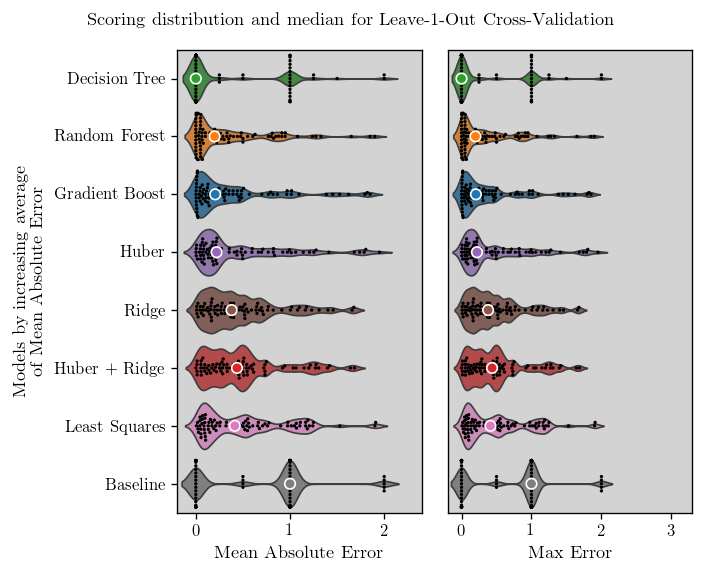

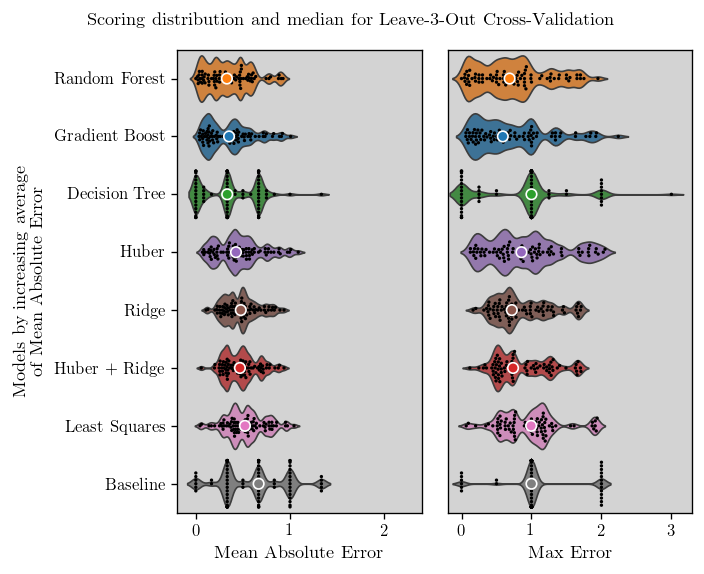

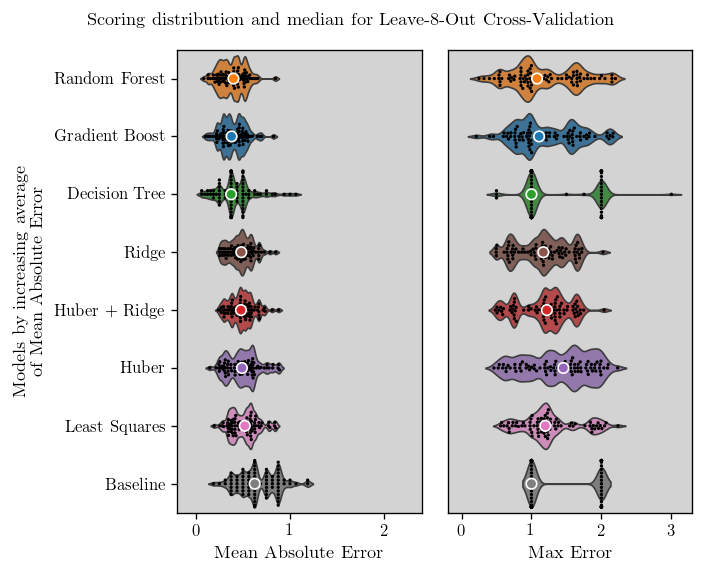

In [39]:
def plot_scoring(scores, model_names, metric_names, p=3, figsize=(6, 5)):

    fig, axes = plt.subplots(ncols=len(metric_names), squeeze=True, figsize=figsize)

    xlims = [[-0.2, 2.4], [-0.2, 3.3]]
    
    colors = pd.DataFrame(index=model_names, columns=["Color"])
    colors["Color"] = sns.color_palette()[:len(model_names)][::-1]
    
    # Sort models according to mean MAE score
    sorting = scores[p][metric_names[0]].mean().sort_values().index
    
    for ax, metric_name, xlim in zip(fig.axes, metric_names, xlims):
        scores_data = scores[p][metric_name].reindex(sorting, axis=1)
        colors_sorted = colors.reindex(sorting, axis=0)["Color"]
        sns.swarmplot(data=scores_data, orient="h", size=2, color="black", ax=ax)
        sns.violinplot(data=scores_data, orient="h", scale="width", palette=colors_sorted, bw=0.13, 
                       linewidth=1, saturation=0.6, inner=None, ax=ax)
        sns.scatterplot(y=scores_data.columns, x=scores_data.median(), hue=scores_data.columns, 
                        palette=colors_sorted, s=40, linewidth=1, marker="o", edgecolor="white", 
                        zorder=3, legend=None, ax=ax)
        ax.set_xlabel(metric_name)
        ax.set_xlim(xlim)
        ax.set_ylabel("")
        ax.set_facecolor("lightgrey")
        
    fig.axes[0].set_ylabel("Models by increasing average \n of {}".format(metric_names[0]))    
    if len(metric_names) > 1:
        fig.axes[1].get_yaxis().set_visible(False)    
    fig.suptitle("Scoring distribution and median for Leave-{}-Out Cross-Validation".format(p))    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

for p in p_values:    
    fig = plot_scoring(scores, model_names, metric_names, p=p)
    fig.savefig(os.path.join("..", conf["data"]["scratch"], "scores-all-p-{}.png".format(p)))

We do not expect our model to give perfect predictions, since the deforestation variable is anyhow discretized. Our reasonable goal might be to expect that our predictions differ from the actual value by no more than 1 (on average or maximally).

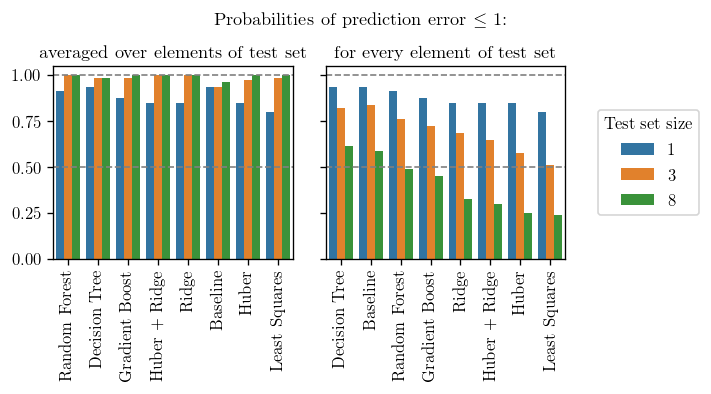

In [40]:
probs = (scores <= 1).sum() / scores.count()
probs = probs.reset_index()
probs.columns = probs.columns[:-1].to_list() + ["Probability"]

fig, axes = plt.subplots(1, 2, figsize=(6, 3.5))

def get_order(metric_name):
    # Sort by average probability over p values
    sorting = sum(probs[(probs["P"] == p) & (probs["Metric"] == metric_name)]
                  .set_index("Model")["Probability"] / 3 for p in p_values)
    return sorting.sort_values(ascending=False).index

for ax, metric_name in zip(axes, metric_names):
    sorting = get_order(metric_name)
    sns.barplot(data=probs[probs["Metric"] == metric_name], 
                x="Model", y="Probability", hue="P", order=sorting, ax=ax)
    ax.axhline(1, ls="--", c='grey', lw=1)
    ax.axhline(0.5, ls="--", c='grey', lw=1)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

axes[0].get_legend().set_visible(False)
axes[1].legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1, title="Test set size")
axes[1].tick_params(labelleft=False) 
axes[1].set_ylabel("")

plt.setp(axes[0].get_legend().get_title(), fontsize=mpl.rcParams["legend.title_fontsize"])


fig.suptitle(r"Probabilities of prediction error $\leq$ 1:")
axes[0].set_title("averaged over elements of test set")
axes[1].set_title("for every element of test set")
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.savefig(os.path.join("..", conf["data"]["scratch"], "prob-error-less-than-one.png"))

Apparently, this is still not an ideal way of choosing a model. All the models guarantee high probability of average error $\leq$ 1 and the baseline model performs best if high probability of maximum error 1 $\leq$ is desired (except for P=8 when Decision Tree wins). To guide our decision on the most appropriate model we plot the weighted average of means and medians of MAE and Max Error to balance our performance estimation.

$\text{Weighted Error Score}$ = $\frac{1}{6} \cdot ( 2 \cdot \left< \text{MAE}\right> + \left< \mathrm{Max\; Error} \right>  + 2 \cdot \text{med(MAE)} + \text{med(Max Error)} )$

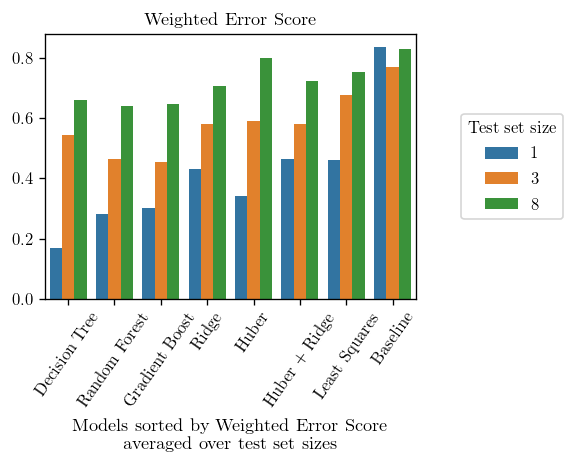

In [41]:
def get_reduced_metrics(scores, metric_method, metric_name):
    metrics = metric_method(scores).reset_index()
    metrics.columns = metrics.columns[:-1].to_list() + [metric_name]
    metrics = (2 * metrics[metrics["Metric"] == "Mean Absolute Error"].drop(columns="Metric").set_index(["P", "Model"]) 
         + metrics[metrics["Metric"] == "Max Error"].drop(columns="Metric").set_index(["P", "Model"])) / 3. 
    return metrics.reset_index()

means = get_reduced_metrics(scores, pd.DataFrame.mean, "Mean")
medians = get_reduced_metrics(scores, pd.DataFrame.median, "Median")
errors = pd.concat([means, medians["Median"]], axis=1)
errors["(Mean + Median) / 2"] = (errors["Mean"] + errors["Median"]) / 2

fig, ax = plt.subplots(figsize=(5, 4))

sorting = sum(errors[errors["P"] == p].set_index("Model")["(Mean + Median) / 2"] for p in p_values)
sorting = sorting.sort_values().index

sns.barplot(data=errors, x="Model", y="(Mean + Median) / 2", hue="P", order=sorting, ax=ax)
ax.set_xlabel("Models sorted by Weighted Error Score \n averaged over test set sizes")
ax.set_ylabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1, title="Test set size")
ax.set_title("Weighted Error Score")
plt.setp(ax.get_legend().get_title(), fontsize=mpl.rcParams["legend.title_fontsize"])

fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["scratch"], "weighted-error-score.png"))

1. Random Forest performs slightly better than Gradient Boost with respect to Weighted Error Score and at the same time has a higher probability of maximum prediction error $\leq$ 1. Moreover, it is conceptually simpler than Gradient Boost. Therefore, I consider it to be the superior model.

2. Decision Tree has the lowest Weighted Error Score for test set size = 1 and is the best performing non-trivial model in ensuring maxium prediction error $\leq$ 1. However, as seen from the distributions of maximum error, it is the only model whose prediction can have an error of 3. It also has a higher Weighted Error Score for largesr test set sizes. That is why I consider it to be the second superior model.

3. Among the linear models Ridge Regression and Huber Regression are superior for respectively large and small test sets.

# Feature Importance and Explainability 

In the previous analysis we have proven generalizability of ML models applied to our dataset. Now we will try understand which environmental and cultural factors are most important. For this purpose we will fit now (selected) models to the whole dataset.

In [42]:
def get_fitted_model(model, X, y, randomize=False):
    if randomize:
        model.set_params(**{"model__random_state": np.random.randint(1000)})
    model.fit(X, y)
    return model

sel_model_names = ["Least Squares", "Ridge", "Huber", "Random Forest"]
sel_models = {name : clone(model) for name, model in zip(model_names, models) if name in sel_model_names}
tree_models = [clone(tree) for i in range(100)]

# Fit non-tree models
for name in sel_model_names:
    sel_models[name] = get_fitted_model(sel_models[name], X, y)

# Fit tree models
for i in range(len(tree_models)):
    tree_models[i] = get_fitted_model(tree_models[i], X, y, randomize=True)
    
tree_r2 = np.array([model.score(X, y) for model in tree_models])
    
# print("We will reject R^2 > 0.90 which are probably overfitted trees.")
# tree_models = [model for model, r2 in zip(tree_models, tree_r2) if r2 <= 0.90]
# tree_r2 = tree_r2[tree_r2 <= 0.90]
    
# Print R^2 scores on the whole dataset (for trees: average)

for name, model in sel_models.items():
    r2 = model.score(X, y)
    print("Model: {}, R^2 score: {:.3f}".format(name, r2))

print("Model: Decision Tree, mean R^2 score: {:.3f}, std: {:.3f}".format(tree_r2.mean(), tree_r2.std()))

Model: Least Squares, R^2 score: 0.670
Model: Ridge, R^2 score: 0.648
Model: Huber, R^2 score: 0.589
Model: Random Forest, R^2 score: 0.996
Model: Decision Tree, mean R^2 score: 0.843, std: 0.040


We observe that although Ridge and Huber Regression were better at predicting than Least Squares, the latter has the highest R2 score: sign of overfitting. Random Forest seem to describe the model almost perfectly, and tree gives a reasonable < 1 R2 (meaning we are probably not overfitting too much).

## Feature importance

Now we will asses the feature importance by tree methods
1. Tree Feature Importance
2. Linear Regression Coefficents
3. Permutation Importance

In [43]:
features = env_cols + cult_cols

### Tree Feature Importance

In [44]:
def get_feat_importance(sel_models, name, tree_models, features):

    feat_random_forest = sel_models[name].named_steps["model"].feature_importances_
    feat_trees = np.array([model.named_steps["model"].feature_importances_ for model in tree_models])
    feat_trees, feat_trees_std = feat_trees.mean(axis=0), feat_trees.std(axis=0)

    feat_importance = pd.DataFrame(data=np.transpose(np.asarray([feat_random_forest, feat_trees, feat_trees_std])), 
                                   columns=[name, "Decision Tree", "Decision Tree (std)"], index=features)
    feat_importance.index.name = "Feature"

    feat_importance = feat_importance.sort_values(by=name, ascending=False)
    return feat_importance

feat_importance = get_feat_importance(sel_models, "Random Forest", tree_models, features)
feat_importance

,Random Forest,Decision Tree,Decision Tree (std)
Feature,,,
Log Rainfall,0.370106,0.317299,0.031835
Abs Latitude,0.210930,0.112926,0.095861
Tephra,0.107205,0.025274,0.028697
Log Area,0.088841,0.081223,0.032688
Log Elevation,0.074284,0.056975,0.033091
Dust,0.055796,0.037137,0.024650
Log Isolation,0.032425,0.054365,0.036391
Age,0.022482,0.001843,0.007439
Individual Ownership,0.017063,0.278828,0.112392


Random Forest predicts that Rainfall and Abs Latitude are two dominant features. Decision Trees also determine Rainfall as the most important predictor but surprisingly Individual Ownership is determined to be almost equally 

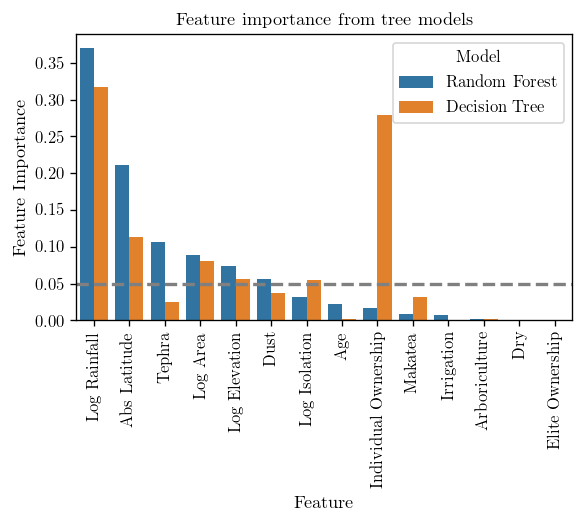

In [45]:
fig, ax = plt.subplots(figsize=(5, 4.5))

df = feat_importance.reset_index().melt(id_vars="Feature", 
                                        var_name="Model", 
                                        value_name='Feature Importance', 
                                        value_vars=["Random Forest", "Decision Tree"])

sns.barplot(data=df, x="Feature", y="Feature Importance", hue="Model", ax=ax)
ax.axhline(0.05, ls = "--", color="grey")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Feature importance from tree models")
plt.setp(ax.get_legend().get_title(), fontsize=mpl.rcParams["legend.title_fontsize"])

fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["scratch"], "tree-importance-all.png"))

Setting threshold at importance 0.05 we can ignore variables: Age, Makatea, Irrigation, Arboriculture, Dry, Elite Ownership.

In [46]:
ignore_from_trees = set(["Age", "Makatea", "Irrigation", "Arboriculture", "Dry", "Elite Ownership"])

### Linear Regression Coefficients

We standarized the data before linear regressions, hence it makes sense to compare magnitudes of individual coefficients.

In [47]:
def get_linear_coeffs(sel_models, names, features):
    coeffs = np.array([sel_models[name].named_steps["model"].coef_ for name in names])
    coeffs = pd.DataFrame(np.transpose(coeffs), columns=names, index=features)
    coeffs.index.name = "Feature"
    # Normalize
    # coeffs /= coeffs.abs().sum()
    coeffs = coeffs.reindex(coeffs[names[0]].abs().sort_values(ascending=False).index)
    return coeffs

coeffs = get_linear_coeffs(sel_models, ["Ridge", "Huber", "Least Squares"], features)

It is confirmed that Rainfall is the largest (negative) predictor of deforestation, however robust regressions (Ridge, Huber) predict smaller effect than Least Squares. We observe that for some prediction the signs of coefficents do not agree. Since Least Squares performed worse than robust regressions we will not use it to select the features.

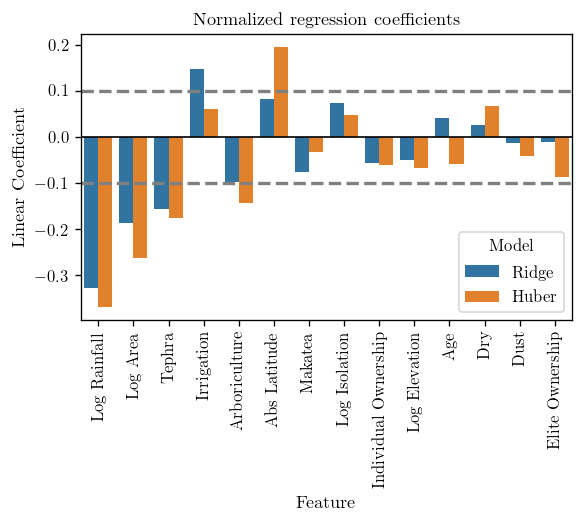

In [48]:
fig, ax = plt.subplots(figsize=(5, 4.5))

df = coeffs.reset_index().melt(id_vars="Feature", 
                               var_name="Model", 
                               value_name="Linear Coefficient",
                               value_vars=["Ridge", "Huber"])

sns.barplot(data=df, x="Feature", y="Linear Coefficient", hue="Model", ax=ax)
ax.axhline(0, c="k", lw=1)
ax.axhline(0.1, ls = "--", color="grey")
ax.axhline(-0.1, ls = "--", color="grey")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Normalized regression coefficients")
plt.setp(ax.get_legend().get_title(), fontsize=mpl.rcParams["legend.title_fontsize"])


fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["scratch"], "linear-coeffs-all.png"))

All coeffcients to the left from Abs Latitude have much lower values. Setting threshold to 0.1 we could decide to ignore variables: Makatea, Log Isolation, Individual Ownership, Log Elevation, Age, Dry, Dust, Elite Ownership.

In [49]:
ignore_from_linear = set(["Makatea", "Log Isolation", "Individual Ownership", "Log Elevation", 
                          "Age", "Dry", "Dust", "Elite Ownership"])

### Permutation importance

In [50]:
import eli5
from eli5.sklearn import PermutationImportance

def get_permutation_importance(sel_models, tree_models, features, X, y):
    imputer = SimpleImputer(strategy="median")
    imputer.fit(X)
    X_imp = imputer.transform(X)

    perm_importance = pd.DataFrame(columns=sel_models.keys(), index=features)
    for name, model in sel_models.items():
        perm_importance[name] = eli5.explain_weights_df(
            PermutationImportance(model, random_state=0).fit(X_imp, y),
            feature_names=features).set_index("feature")["weight"].rename(name)

    perm_importance_trees = pd.DataFrame(columns=list(range(len(tree_models))), index=features)

    for i, model in enumerate(tree_models):
        perm_importance_trees[i] = eli5.explain_weights_df(
            PermutationImportance(model, random_state=0).fit(X_imp, y), 
            feature_names=features).set_index("feature")["weight"].rename(i)

    perm_importance_trees = pd.DataFrame(np.transpose(np.asarray([perm_importance_trees.mean(axis=1), 
                                                                  perm_importance_trees.std(axis=1)])),
                                         columns=["Decision Tree", "Decision Tree (std)"],
                                         index=features)

    perm_importance = pd.concat([perm_importance, perm_importance_trees], axis=1)

    perm_importance = perm_importance.reindex(perm_importance.drop(columns="Decision Tree (std)").sum(axis=1).
                                              sort_values(ascending=False).index)
    return perm_importance

In [51]:
perm_importance = get_permutation_importance(sel_models, tree_models, features, X, y)
perm_importance = perm_importance.drop(columns="Least Squares")
perm_importance

,Ridge,Huber,Random Forest,Decision Tree,Decision Tree (std)
Log Rainfall,0.391297,0.453559,0.734451,1.187130,0.228434
Abs Latitude,0.024553,0.052486,0.417852,0.498850,0.341722
Log Area,0.127979,0.208447,0.155934,0.157164,0.140735
Tephra,0.091519,0.096815,0.077887,0.131955,0.171814
Individual Ownership,0.005854,0.000846,0.018842,0.341204,0.142010
Log Elevation,0.009739,0.002185,0.119109,0.141393,0.153959
Log Isolation,0.020264,0.006775,0.026556,0.138047,0.100633
Irrigation,0.058485,0.022722,0.004679,0.000097,0.000684
Dust,0.001679,-0.002305,0.064574,0.075587,0.066987
Makatea,0.019374,0.014733,0.001824,0.065585,0.054750


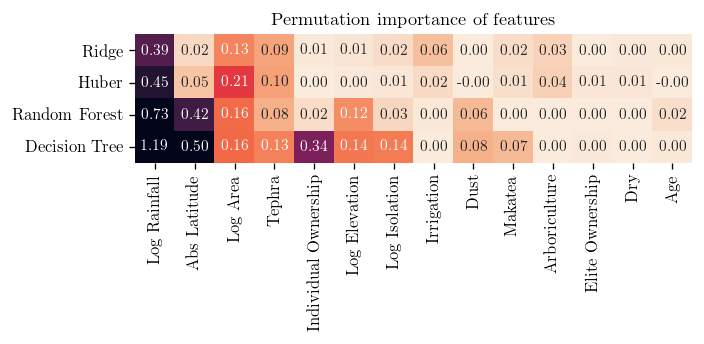

In [52]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.heatmap(perm_importance.drop(columns="Decision Tree (std)").transpose(), 
            annot=True, annot_kws={"size" : 9}, fmt=".2f", vmin=0, vmax=0.5, cmap="rocket_r", cbar=None, ax=ax);

ax.set_title("Permutation importance of features")

fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["scratch"], "perm-importance-all.png"))

## Feature Selection

Our best candidates to remove were:

In [53]:
print("From Random Forest and Decision Trees: \n", ignore_from_trees)
print("From Huber and Ridge: \n", ignore_from_linear)
print("Intersection:", ignore_from_trees & ignore_from_linear)

From Random Forest and Decision Trees: 
 {'Makatea', 'Dry', 'Age', 'Arboriculture', 'Irrigation', 'Elite Ownership'}
From Huber and Ridge: 
 {'Makatea', 'Dust', 'Dry', 'Age', 'Log Elevation', 'Elite Ownership', 'Individual Ownership', 'Log Isolation'}
Intersection: {'Makatea', 'Dry', 'Elite Ownership', 'Age'}


Based on this information and permutation importance:
1. We will remove Elite Ownership, Makatea, Dry and Age as they turn out to be irrelevant in all analyses. Age=3 has been identified in EDA as a potentially good predictor of Deforestation, however this variable does not show up strongly in our analyses, hence we neglect it altogether.
2. We will remove Arboriculture, Irrigation and Makatea since they score poorly in feature importance analysis of tree models and permutation importance from all models.
3. We will remove Dust since it scores poorly in linear coefficient analysis and permutation importance, and also has a low feature importance from tree models.
4. We could remove Elevation since it scores weakly in all analyses and previous analyses showed that it is strongly correlated with Area, which we are going to keep. However, it has a high importance on Random Forest so we will nevertheless keep it. We would drop it if only linear models were considered.
5. Individual Ownership and Isolation score poorly in all the models expect Decision Trees. We will keep them since they might show some interesting interactions that have been identified only by Decision Trees.


In [54]:
from sklearn.compose import ColumnTransformer

sel_features = ["Log Rainfall", "Abs Latitude", "Log Area", 
                "Individual Ownership", "Tephra", "Log Elevation", "Log Isolation"]

selector = ColumnTransformer([("select", "passthrough", [features.index(f) for f in sel_features])], 
                             remainder="drop")

Correlation between selected variables

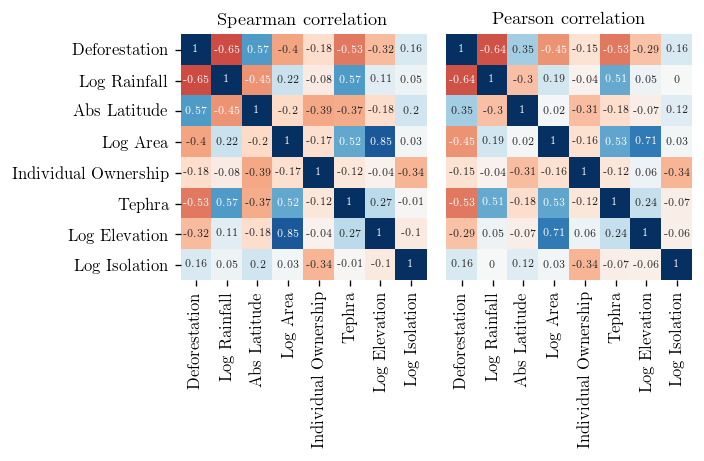

In [55]:
fig, axes = plt.subplots(ncols=2, figsize=(6, 4))
corr1 = data[["Deforestation"] + sel_features].corr(method="spearman").round(2)
corr2 = data[["Deforestation"] + sel_features].corr(method="pearson").round(2)
sns.heatmap(corr1, vmin=-1, vmax=1, center=0, cmap="RdBu", cbar=None, cbar_kws={"shrink": .5},
            annot=True, annot_kws={"size": 6}, square=True, ax=axes[0])
sns.heatmap(corr2, vmin=-1, vmax=1, center=0, cmap="RdBu", cbar=None, cbar_kws={"shrink": .5},
            annot=True, annot_kws={"size": 6}, square=True, ax=axes[1])
axes[1].get_yaxis().set_visible(False)

axes[0].set_title("Spearman correlation")
axes[1].set_title("Pearson correlation")
fig.tight_layout()

fig.savefig(os.path.join("..", conf["data"]["out"], "corr.png"))

## Model Refinement

This time we will perform the full nested CV scoring. We will perform scoring in Leave-One-Out cross validation, and for each outer CV we will perform Leave-3-Out CV search of params. 

### Ridge Regression

In [56]:
# score before, after feature selection = 0.509, 0.457
model = Ridge(alpha=10, random_state=0)

param_dist = {"alpha": stats.randint(7, 12 + 1)}

ridge, pipeline_param_dist = generate_pipeline(imputer, model, selector=selector, 
                                                  preprocessor=StandardScaler(), params=param_dist)

if searching_on:
    cv_params = search_params(ridge, pipeline_param_dist, X, y, n_iters=10, p=3, n_splits=40)
    report_on_search(cv_params)

# Decrease number of iterations and splits for CV scoring
ridge = search_params(ridge, pipeline_param_dist, X, y, n_iters=5, p=3, n_splits=20, search=False)

Searching param space, iterations: 5, evaluation splits: 20


### Huber Linear Regression

In [57]:
# score before, after feature selection = 0.501, 0.442
model = HuberRegressor(epsilon=1.03)

param_dist = {"epsilon": [1 + i * 0.01 for i in range(10)]}

huber, pipeline_param_dist = generate_pipeline(imputer, model, selector=selector,
                                               preprocessor=StandardScaler(), params=param_dist)

if searching_on:
    cv_params = search_params(huber, pipeline_param_dist, X, y, n_iters=10, p=3, n_splits=40)
    report_on_search(cv_params)

# Decrease number of iterations and splits for CV scoring
huber = search_params(huber, pipeline_param_dist, X, y, n_iters=5, p=3, n_splits=20, search=False)

Searching param space, iterations: 5, evaluation splits: 20


### Tree Regression

In [58]:
# score before, after feature selection = 0.396, 0.279
model = DecisionTreeRegressor(max_depth=7, 
                              max_features=4, 
                              min_samples_split=4, 
                              criterion="mae", 
                              random_state=0)

param_dist = {"max_depth": [5, 6, 7],
              "max_features": [4, 5, 6],
              "min_samples_split": [2, 3, 4]}

tree, pipeline_param_dist = generate_pipeline(imputer, model, selector=selector, params=param_dist)

if searching_on:
    cv_params = search_params(tree, pipeline_param_dist, X, y, n_iters=20, p=3, n_splits=40)
    report_on_search(cv_params)

# Decrease number of iterations and splits for CV scoring
tree = search_params(tree, pipeline_param_dist, X, y, n_iters=25, p=3, n_splits=20, search=False)

Searching param space, iterations: 25, evaluation splits: 20


### Random Forest Regression

In [59]:
# Score before, after feature selection = 0.369, 0.371
model = RandomForestRegressor(n_estimators=20, 
                              max_depth=7, 
                              max_features=4, 
                              min_samples_split=2, 
                              bootstrap=False, 
                              criterion="mse",
                              random_state=0)

param_dist = {"max_depth": [5, 6, 7],
              "max_features": [4, 5, 6],
              "min_samples_split": [2, 3, 4]}

random_forest, pipeline_param_dist = generate_pipeline(imputer, model, selector=selector, params=param_dist)

if searching_on:
    cv_params = search_params(random_forest, pipeline_param_dist, X, y, n_iters=20, p=3, n_splits=40)
    report_on_search(cv_params)

# Decrease number of iterations and splits for CV scoring
random_forest = search_params(random_forest, pipeline_param_dist, X, y, n_iters=15, p=3, n_splits=20, search=False)

Searching param space, iterations: 15, evaluation splits: 20


## Scoring

We have observed that our models have lower MAE after the feature selection. This means we have tamed the overfitting by choosing only the meaningful features. Let's now perform a proper nested cross validation scoring.

In [60]:
scored_models = [baseline, ridge, huber, tree, random_forest]
scored_model_names = ["Baseline", "Ridge",
                      "Huber", "Decision Tree", "Random Forest"]

# This can take a couple of minutes! Nested CV is computationally costly.
scores_2 = get_scoring(scored_models, scored_model_names,
                       metrics=["neg_mean_absolute_error"], metric_names=["Prediction Error"],
                       p_values=[1])

Test set size (P): 1, scoring metric: Prediction Error. Model: Baseline
Scoring, number of splits: 80
Scores: mean = 0.675 +- 0.064, median = 1.000, stand. dev. = 0.576

Test set size (P): 1, scoring metric: Prediction Error. Model: Ridge
Scoring, number of splits: 80
Scores: mean = 0.461 +- 0.047, median = 0.351, stand. dev. = 0.417

Test set size (P): 1, scoring metric: Prediction Error. Model: Huber
Scoring, number of splits: 80
Scores: mean = 0.417 +- 0.050, median = 0.229, stand. dev. = 0.449

Test set size (P): 1, scoring metric: Prediction Error. Model: Decision Tree
Scoring, number of splits: 80
Scores: mean = 0.394 +- 0.067, median = 0.000, stand. dev. = 0.600

Test set size (P): 1, scoring metric: Prediction Error. Model: Random Forest
Scoring, number of splits: 80
Scores: mean = 0.373 +- 0.046, median = 0.253, stand. dev. = 0.415



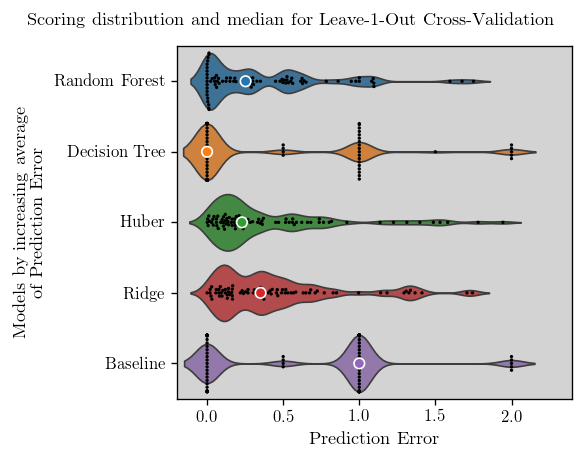

In [61]:
fig = plot_scoring(scores_2, scored_model_names, metric_names=["Prediction Error"], 
                   p=1, figsize=(5, 4))
fig.savefig(os.path.join("..", conf["data"]["out"], "scoring.png"))

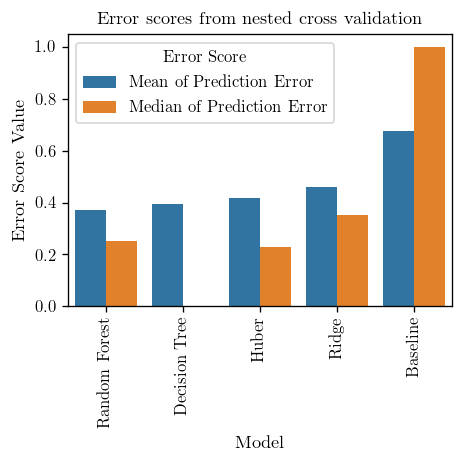

In [62]:
reduced_scores = pd.DataFrame([scores_2.mean(), scores_2.median()], 
                              index=["Mean of Prediction Error", "Median of Prediction Error"])
reduced_scores = reduced_scores[1]["Prediction Error"]
reduced_scores.index.name = "Error Score"
reduced_scores = reduced_scores.sort_values(by="Mean of Prediction Error", axis=1)

fig, ax = plt.subplots(figsize=(4, 4))

df = reduced_scores.reset_index().melt(id_vars="Error Score", 
                                       var_name="Model", 
                                       value_name="Error Score Value")

sns.barplot(data=df, x="Model", y="Error Score Value", hue="Error Score", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Error scores from nested cross validation")
plt.setp(ax.get_legend().get_title(), fontsize=mpl.rcParams["legend.title_fontsize"])

fig.tight_layout()

fig.savefig(os.path.join("..", conf["data"]["out"], "error-score.png"))

We have established that all our selected models, when used for predicting deforestation on one single island, will exhibit average prediction error of less than 0.5. Moreover, a typical prediction error (median) for Decision Tree, Random Forest and Huber Regression will be lower than 0.25.

## Feature importance: repeated

For this round we use the models with hyperparameters found to be best from Leave-3-Out cross validation.

In [63]:
# Omit selectors from pipelines since they don't work well with PermutationImportance
# Huber
model = HuberRegressor(epsilon=1.03)
huber = generate_pipeline(imputer, model, preprocessor=StandardScaler())

# Tree
model = DecisionTreeRegressor(max_depth=7, 
                              max_features=4, 
                              min_samples_split=4, 
                              criterion="mae", 
                              random_state=0)
tree = generate_pipeline(imputer, model)

# Random Forest
model = RandomForestRegressor(n_estimators=20, 
                              max_depth=7, 
                              max_features=4, 
                              min_samples_split=2, 
                              bootstrap=False, 
                              criterion="mse",
                              random_state=0)
random_forest = generate_pipeline(imputer, model)

In [64]:
sel_models = {"Huber": huber, "Random Forest": random_forest}
tree_models = [clone(tree) for i in range(100)]

# Fit non-tree models
for name, model in sel_models.items():
    sel_models[name] = get_fitted_model(model, X[sel_features], y)

# Fit tree models
for i in range(len(tree_models)):
    tree_models[i] = get_fitted_model(tree_models[i], X[sel_features], y, randomize=True)
        
tree_r2 = np.array([model.score(X[sel_features], y) for model in tree_models])

# Print R^2 scores on the whole dataset (for trees: average)
for name, model in sel_models.items():
    r2 = model.score(X[sel_features], y)
    print("Model: {}, R^2 score: {:.3f}".format(name, r2))
print("Model: Decision Tree, mean R^2 score: {:.3f}, std: {:.3f}".format(tree_r2.mean(), tree_r2.std()))

Model: Huber, R^2 score: 0.556
Model: Random Forest, R^2 score: 0.998
Model: Decision Tree, mean R^2 score: 0.892, std: 0.061


### Tree Feature Importance

In [65]:
feat_importance = get_feat_importance(sel_models, "Random Forest", tree_models, sel_features)
feat_importance

,Random Forest,Decision Tree,Decision Tree (std)
Feature,,,
Log Rainfall,0.423280,0.341803,0.056474
Abs Latitude,0.251064,0.206112,0.110693
Log Area,0.120328,0.120974,0.064507
Log Elevation,0.081155,0.108545,0.073412
Tephra,0.050091,0.032847,0.030330
Log Isolation,0.049617,0.060136,0.043235
Individual Ownership,0.024466,0.129582,0.143434


There is a considerable variance in importances of Individual Ownership for Decision Trees.

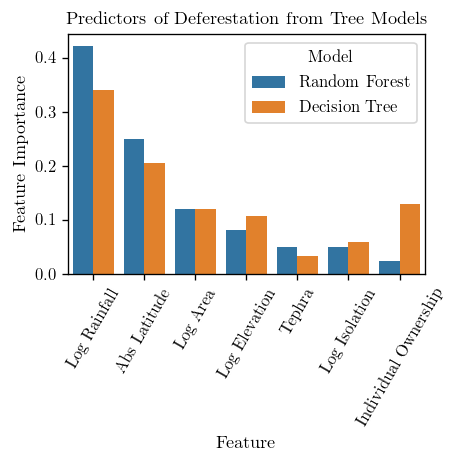

In [66]:
fig, ax = plt.subplots(figsize=(4, 4))

df = feat_importance.reset_index().melt(id_vars="Feature", 
                                        var_name="Model", 
                                        value_name='Feature Importance', 
                                        value_vars=["Random Forest", "Decision Tree"])

sns.barplot(data=df, x="Feature", y="Feature Importance", hue="Model", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
ax.set_title("Predictors of Deferestation from Tree Models")
plt.setp(ax.get_legend().get_title(), fontsize=mpl.rcParams["legend.title_fontsize"])

fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["out"], "tree-importance.png"))

### Linear Regression Coefficients

In [67]:
coeffs = get_linear_coeffs(sel_models, ["Huber"], sel_features)
coeffs

,Huber
Feature,
Log Rainfall,-0.338036
Log Area,-0.305952
Abs Latitude,0.303853
Individual Ownership,-0.113536
Tephra,-0.092102
Log Isolation,0.071232
Log Elevation,-0.050120


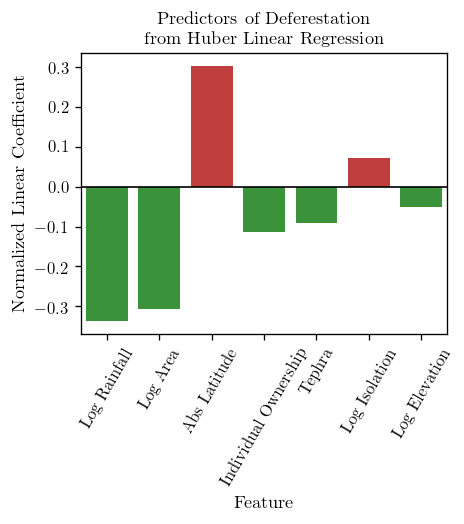

In [68]:
fig, ax = plt.subplots(figsize=(4, 4.5))

green, red = sns.color_palette()[2:4]
colors = pd.DataFrame(index=sel_features, columns=["Color"])
for f in sel_features:
    colors.loc[f, "Color"] = red if (coeffs.loc[f, "Huber"] > 0) else green
colors = colors.reindex(index=coeffs.index)

sns.barplot(data=coeffs.transpose(), palette=colors["Color"], ax=ax)
ax.axhline(0, c="k", lw=1)
ax.set_ylabel("Normalized Linear Coefficient")
ax.set_title("Predictors of Deferestation \n from Huber Linear Regression")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["out"], "linear-coeffs.png"))

### Permutation Importance

In [69]:
perm_importance = get_permutation_importance(sel_models, tree_models, sel_features, X[sel_features], y)
perm_importance

,Huber,Random Forest,Decision Tree,Decision Tree (std)
Log Rainfall,0.320426,0.830349,1.005389,0.188912
Abs Latitude,0.143319,0.494575,0.645729,0.245511
Log Area,0.173299,0.147801,0.393273,0.265077
Log Elevation,-0.004369,0.098772,0.324804,0.232257
Individual Ownership,0.029959,0.035592,0.199739,0.178501
Tephra,0.018227,0.032360,0.207553,0.206660
Log Isolation,0.010462,0.042465,0.132045,0.099377


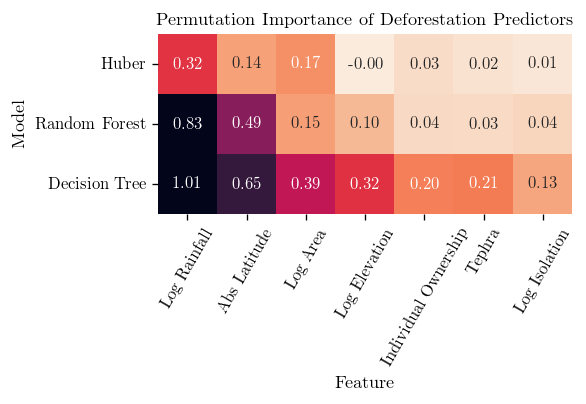

In [70]:
fig, ax = plt.subplots(figsize=(5, 3.5))

sns.heatmap(perm_importance.drop(columns="Decision Tree (std)").transpose(), 
            annot=True, annot_kws={"size": 10}, fmt=".2f", vmin=0, vmax=0.75, cbar=None, cmap="rocket_r", ax=ax);
ax.set_ylabel("Model")
ax.set_xlabel("Feature")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

ax.set_title("Permutation Importance of Deforestation Predictors")

fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["out"], "perm-importance.png"))

Interestingly, now Abs Latitude is an important predictor for Huber Regression, while Tephra ceases to be one.

## Model Explainability

We will use SHapley Additive exPlanations (SHAP) to better understand individual outcomes of our models. In this section we will focus on Random Forest and Huber Regression. The structure of individual Decision Trees depends strongly on how were they fitted and hence and individual Decision Tree does not provide a robust justification for a particular outcome.

### Huber Reggression

SHAP applied to linear models produces trivial results since the outcome is a sum of independent factors. For each island we can attribute how much their score was influenced by individual features by simple multiplications of linear coefficients with the values of features. On average, Rainfall, Area and Absolute Latitude have the largest impact on the level of Deforestation.

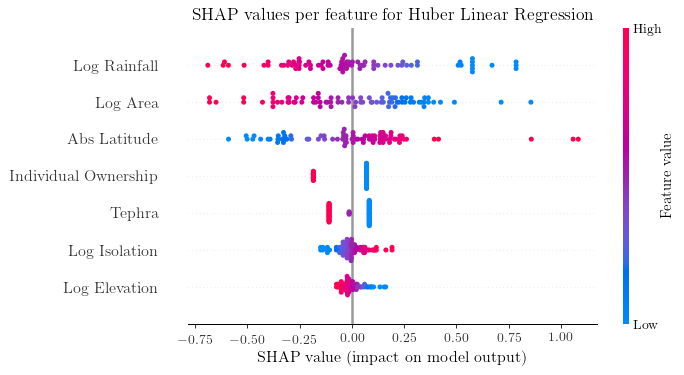

In [71]:
plt.style.use(conf["viz"])

preprocessor = StandardScaler()
X_scaled = preprocessor.fit_transform(X[sel_features])

explainer = shap.LinearExplainer(huber.named_steps["model"], X_scaled, feature_dependence="independent")
shap_values = explainer.shap_values(X_scaled)

shap.summary_plot(shap_values, X_scaled, feature_names=sel_features, show=False)
fig = plt.gcf()
fig.set_dpi(90)
fig.axes[0].set_title("SHAP values per feature for Huber Linear Regression", fontsize=14)
fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["out"], "shap-summary-linear.png"), dpi=150)

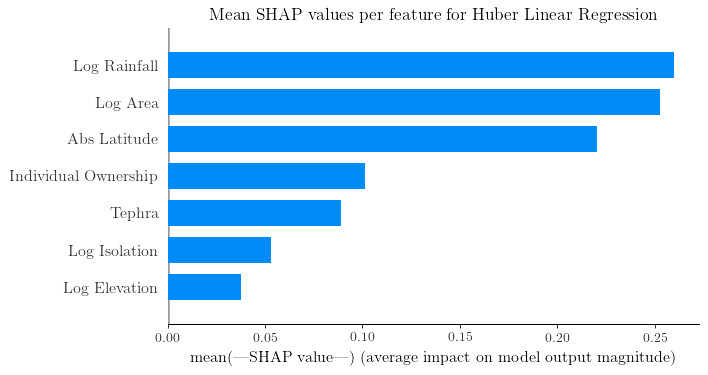

In [72]:
shap.summary_plot(shap_values, X_scaled, plot_type="bar", feature_names=sel_features, show=False)
fig = plt.gcf()
fig.set_dpi(90)
fig.axes[0].set_title("Mean SHAP values per feature for Huber Linear Regression", fontsize=14)
fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["scratch"], "shap-mean-linear.png"), dpi=150)

### Random Forest

The evaluation of SHAP values for tree models (or their ensembles) is more involved and leads to non-trivial insights. Particular features can have impacts of different signs for different predictions. This is summarized in the first plot below. On average, it is Rainfall, Latitude and Area which have the most impact.

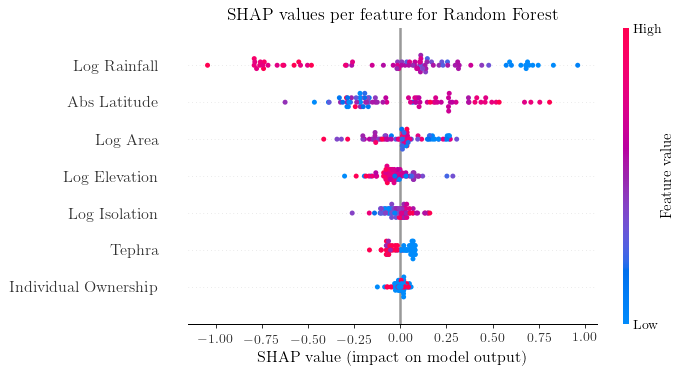

In [73]:
explainer = shap.TreeExplainer(random_forest.named_steps["model"])
shap_values = explainer.shap_values(X[sel_features])

shap.summary_plot(shap_values, X[sel_features], show=False)
fig = plt.gcf()
fig.set_dpi(90)
fig.axes[0].set_title("SHAP values per feature for Random Forest", fontsize=14)
fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["out"], "shap-summary-tree.png"), dpi=150)

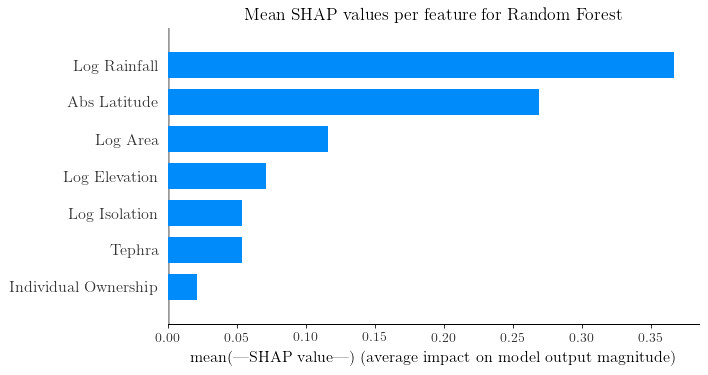

In [74]:
shap.summary_plot(shap_values, X[sel_features], plot_type="bar", show=False)
fig = plt.gcf()
fig.set_dpi(90)
fig.axes[0].set_title("Mean SHAP values per feature for Random Forest", fontsize=14)
fig.tight_layout()
fig.savefig(os.path.join("..", conf["data"]["scratch"], "shap-mean-tree.png"), dpi=150)

We could try to find interactions between our features. It would be especially interesting to see if Individual Ownership influences the contributions of environmental variables to the level of Deforestation.

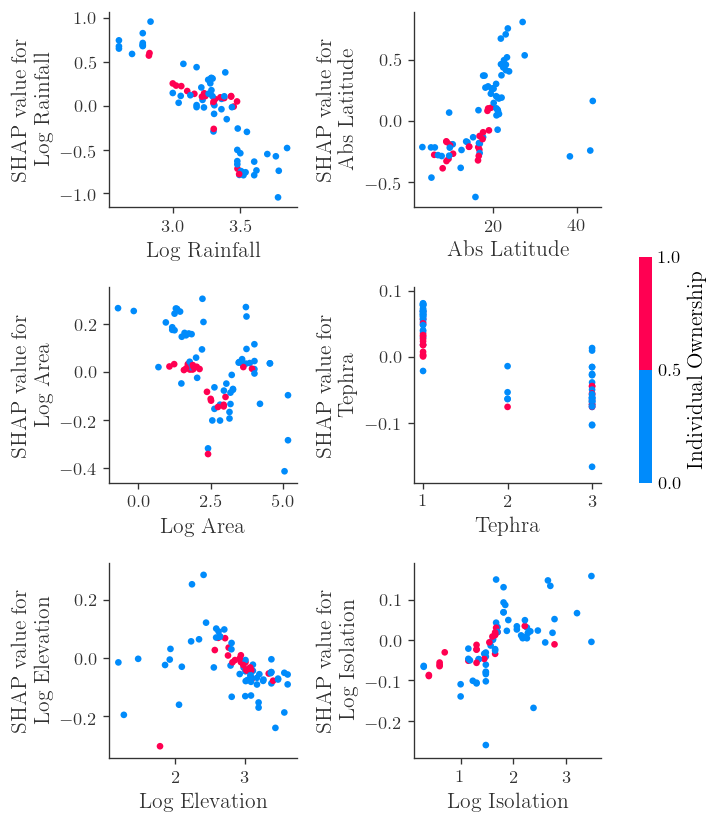

In [75]:
fig, axes = plt.subplots(3, 2, figsize=(5.5, 7))

remove_legend = False

for feature, ax in zip([f for f in sel_features if f != "Individual Ownership"], fig.axes):
    shap.dependence_plot(feature, shap_values, X[sel_features], interaction_index="Individual Ownership",
                         show=False, ax=ax)
    if remove_legend:
        fig.axes[-1].remove()
    else:
        remove_legend = True
        
fig.tight_layout()
        
# Correct the position of the last axis
pos = axes.flat[-1].get_position()
pos_normal = axes.flat[1].get_position()
axes.flat[-1].set_position([pos.x0, pos.y0, pos_normal.width, pos_normal.height])

# Correct the position of the colorbar
fig.axes[-1].set_position([0.98, 0.3, 0.02, 0.5])

Apparently, no clear interaction is seen.

## Explaining outcomes for individual islands

Let us now do predictions for individual islands and explain them. For that purpose we will train the models on the dataset excluding the island we are making the prediction for.

In [76]:
def explain_outcome(island, model, X, y, drop_test=False, model_type="Tree"):
    # Select test to be data for island
    X_train, X_test = X, X.loc[island]
    y_train, y_test = y, y.loc[island]
    X_test = X_test.values.reshape(1, -1)
    # Drop X_test from X_train (optional)
    if drop_test:
        X_train, y_train = X_train.drop(index=island), y_train.drop(index=island)
    # Clone model from the pipeline
    cloned_model = clone(model.named_steps["model"])
    # We have to repeat steps from the pipeline
    imputer = SimpleImputer(strategy="median")
    imputer.fit(X_train)
    X_train, X_test = imputer.transform(X_train), imputer.transform(X_test)
    if model_type == "Linear":
        preprocessor = StandardScaler()
        preprocessor.fit(X_train)
        X_train, X_test = preprocessor.transform(X_train), preprocessor.transform(X_test)
        feature_names = [f + " (n)" for f in X.columns]
    else:
        feature_names = X.columns
    # Fit model
    cloned_model.fit(X_train, y_train)
    print("{} Model's R^2: {:.3f}".format(model_type, cloned_model.score(X_train, y_train)))
    pred_value = cloned_model.predict(X_test)[0]
    if model_type == "Tree":
        explainer = shap.TreeExplainer(cloned_model)
    if model_type == "Linear":
        explainer = shap.LinearExplainer(cloned_model, X_train, feature_dependence="independent")
    shap_values = explainer.shap_values(X_test)
    print("Island: {}, real Deforestation: {}, predicted: {:.2f}".format(island, y_test, pred_value))
    print(data.drop(columns=["Area 50", "Isolation 75"]).iloc[:, :17].loc[island])
    return shap.force_plot(explainer.expected_value, shap_values, X_test, 
                           feature_names=feature_names, figsize=(25,3), matplotlib=False)


drop_test = True

### Easter Island

Interestingly, neither Random Forest nor Huber Linear Regression predict level 5 deforestation for Easter Island.

In [77]:
explain_outcome("Easter", huber, X[sel_features], y, drop_test, model_type="Linear")    

Linear Model's R^2: 0.546
Island: Easter, real Deforestation: 5.0, predicted: 4.18
Archipelago             SE Polynesia
Deforestation                      5
Latitude                      -27.11
Longitude                     250.65
Area                             166
Isolation                       1600
Elevation                        510
Rainfall                        1198
Dust                               5
Makatea                            0
Age                              2.5
Tephra                             1
Irrigation                         0
Dry                                1
Arboriculture                      0
Elite Ownership                    0
Individual Ownership               0
Name: Easter, dtype: object


In [78]:
explain_outcome("Easter", random_forest, X[sel_features], y, drop_test, model_type="Tree")

Tree Model's R^2: 0.994
Island: Easter, real Deforestation: 5.0, predicted: 3.91
Archipelago             SE Polynesia
Deforestation                      5
Latitude                      -27.11
Longitude                     250.65
Area                             166
Isolation                       1600
Elevation                        510
Rainfall                        1198
Dust                               5
Makatea                            0
Age                              2.5
Tephra                             1
Irrigation                         0
Dry                                1
Arboriculture                      0
Elite Ownership                    0
Individual Ownership               0
Name: Easter, dtype: object


### Hawaii (leeward side)

Both models predict correctly that the leeward side of Hawaii island has higher Deforestation level than the windward side due to difference in rainfall.

In [79]:
explain_outcome("Hawaii (lee.)", huber, X[sel_features], y, drop_test, model_type="Linear")

Linear Model's R^2: 0.553
Island: Hawaii (lee.), real Deforestation: 4.0, predicted: 3.79
Archipelago             Hawaii
Deforestation                4
Latitude                 19.51
Longitude               204.22
Area                     10433
Isolation                 3000
Elevation                 4205
Rainfall                   500
Dust                       420
Makatea                      0
Age                        1.5
Tephra                       1
Irrigation                   0
Dry                          1
Arboriculture                0
Elite Ownership              1
Individual Ownership         0
Name: Hawaii (lee.), dtype: object


In [80]:
explain_outcome("Hawaii (lee.)", random_forest, X[sel_features], y, drop_test, model_type="Tree")

Tree Model's R^2: 0.996
Island: Hawaii (lee.), real Deforestation: 4.0, predicted: 3.45
Archipelago             Hawaii
Deforestation                4
Latitude                 19.51
Longitude               204.22
Area                     10433
Isolation                 3000
Elevation                 4205
Rainfall                   500
Dust                       420
Makatea                      0
Age                        1.5
Tephra                       1
Irrigation                   0
Dry                          1
Arboriculture                0
Elite Ownership              1
Individual Ownership         0
Name: Hawaii (lee.), dtype: object


### Hawaii (windward side)

In [81]:
explain_outcome("Hawaii (wind.)", huber, X[sel_features], y, drop_test, model_type="Linear")

Linear Model's R^2: 0.563
Island: Hawaii (wind.), real Deforestation: 3.0, predicted: 2.84
Archipelago             Hawaii
Deforestation                3
Latitude                 19.72
Longitude               204.82
Area                     10433
Isolation                 3000
Elevation                 4205
Rainfall                  3000
Dust                       420
Makatea                      0
Age                        1.5
Tephra                       1
Irrigation                   0
Dry                          1
Arboriculture                0
Elite Ownership              1
Individual Ownership         0
Name: Hawaii (wind.), dtype: object


In [82]:
explain_outcome("Hawaii (wind.)", random_forest, X[sel_features], y, drop_test, model_type="Tree")

Tree Model's R^2: 0.998
Island: Hawaii (wind.), real Deforestation: 3.0, predicted: 2.75
Archipelago             Hawaii
Deforestation                3
Latitude                 19.72
Longitude               204.82
Area                     10433
Isolation                 3000
Elevation                 4205
Rainfall                  3000
Dust                       420
Makatea                      0
Age                        1.5
Tephra                       1
Irrigation                   0
Dry                          1
Arboriculture                0
Elite Ownership              1
Individual Ownership         0
Name: Hawaii (wind.), dtype: object


## All predictions of Huber Regression model

Since the predictions of a robust linear regression model do not strongly depend whether we include the test set in the training set or not, we list here all the predictions of the model trained on the full dataset. The entries where prediction error is large, such as Easter Island, call for additional factors to be explained.

In [83]:
def get_predictions(model, X, y):
    pred = model.predict(X)
    res = y.reset_index()
    res["Predicted Deforestation"] = pred
    res["Prediction Error"] = res["Predicted Deforestation"] - res["Deforestation"]
    res = res.set_index("Island")
    return res.round(2)

In [84]:
pred = get_predictions(huber, X[sel_features], y)
pred[abs(pred["Prediction Error"]) > 0.5]

,Deforestation,Predicted Deforestation,Prediction Error
Island,,,
Rarotonga,3.0,3.73,0.73
Taveuni (lee.),2.0,2.88,0.88
Vanua Levu (lee.),4.0,2.69,-1.31
Lakeba,4.0,3.43,-0.57
Viti Levu (lee.),4.0,2.78,-1.22
Lanai,3.5,4.23,0.73
Molokai (wind.),3.0,3.68,0.68
Kauai (wind.),3.0,3.52,0.52
Niihau,5.0,4.21,-0.79


We plot the distribution of residuals (prediction errors). They follow an unimodal distribution - which confirms the applicability of the linear regression model.

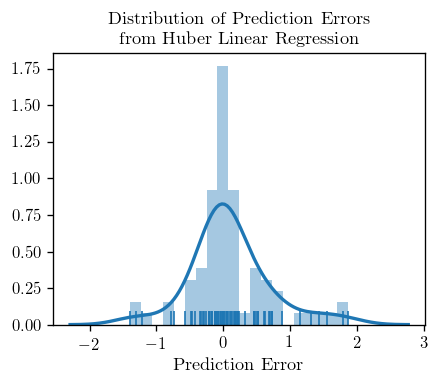

In [85]:
fig, ax = plt.subplots()

sns.distplot(pred["Prediction Error"], rug=True, kde_kws=dict(bw=0.3), ax=ax)
ax.set_title("Distribution of Prediction Errors \n from Huber Linear Regression")

fig.savefig(os.path.join("..", conf["data"]["scratch"], "residuals.png"))

# Conclusion

## Summary

We have performed an initial exploratory data analysis, followed by preliminary model building (least squares linear regression, robust linear regressions, single tree and tree ensemble methods) and selection of the most relevant variables: 
* Rainfall (log)
* Absolute Latitude
* Area (log)
* Individual Ownership (log)
* Tephra
* Elevation (log)
* Isolation (log)

The we trained the robust linear regressors, tree models and random forest on the selected features only. The best performing models in Leave-1-Out cross validation (i.e. train model on 79 samples and predict the 80th and repeat 80 times) turned out to be Random Forest, Decision Tree (averaged) and Huber Regression, with noticeable differences in medians of prediction error but not in averages. 

The best predictors from Huber regression turned out to be (based on normalized regression coefficients):
* Rainfall (negative)
* Area (negative)
* Absolute Latitude (positive)

The features of most importance in tree models (Random Forest and averaged Decision Trees) are:
* Rainfall
* Absolute Latitude
* Area 
* Elevation
* Individual Ownership (for averaged Decision Trees)

Permutation importance is generally aligned with those results.

SHAP values can provide us insights how values of those features influenced the individual deforestation predictions from the Random Forest. While general negative/positive trends are consistent with the results of Huber regression, in some cases similar values of variables (e.g. Area, Individual Ownership but not Rainfall) can have both negative and positive effects on the outcome, suggesting some interactions between variables. Such interactions can in principle be understood by the methods of machine learning explainability, which could be a potentially big contribution to data-driven environmental research. However, no clear interactions have been found in the Random Forest trained on this dataset.

## Comparison with previous works

Rollet & Diamond, 2004 found the following environmental predictors to be significant (multivariate robust linear regression and stepwise variable selection):
* Rainfall (negative)
* Absolute Latitude (positive)
* Tephra (negative)
* Area (negative)
* Isolation (positive)

Atkinson et al., 2016 found the following environmental and cultural predictors to be significant and most important (Phylogenetic Generalized Least-Squares + spatial analysis, averaging over all possible combinations of predictors based on Akaike Information Criterion):
* Rainfall (negative)
* Irrigation (positive)
* Elevation (negative)
* Tephra=2 (negative)
* Isolation (positive)

Those results share similarities but have also important differences in comparison to our results. General trends agree, but attributing which factors are statistically significant is tricky. Nevertheless, environmental and cultural factors, rainfall being definitely the most important one, can explain a big portion of deforestation variance in the dataset.

